<a href="https://colab.research.google.com/github/bchaithanyasai/PredictLateArrivalsPaper/blob/master/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install httplib2==0.15.0

     |████████████████████████████████| 102kB 1.5MB/s 
ERROR: google-api-python-client 1.7.12 has requirement httplib2<1dev,>=0.17.0, but you'll have httplib2 0.15.0 which is incompatible.
  Found existing installation: httplib2 0.17.1
    Uninstalling httplib2-0.17.1:
      Successfully uninstalled httplib2-0.17.1


In [0]:
!pip install kaggle

In [0]:
!mkdir /root/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bchaithanyasai","key":"0b58fa9aae58389cf6b4737e58677d74"}'}

In [0]:
!pwd

/content


In [0]:
!ls

drive  kaggle.json  sample_data


In [0]:
!cp /content/kaggle.json /root/.kaggle/

In [0]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-03 22:53:52          42618  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        246KB  2020-04-05 11:44:01           1053  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            334  
vitaliymalcev/russian-passenger-air-service-20072020           Russian passenger air service 2007-2020             239KB  2020-04-02 22:27:03            236  
bappekim/air-pollution-in-seoul               

In [0]:
!cd /content

In [0]:
!kaggle datasets download -d usdot/flight-delays

 97% 185M/191M [00:03<00:00, 54.1MB/s]
100% 191M/191M [00:03<00:00, 56.0MB/s]


In [0]:
!ls

drive  flight-delays.zip  kaggle.json  sample_data


In [0]:
import pandas as pd
!pip install pyunpack
from pyunpack import Archive
Archive('flight-delays.zip').extractall('/content')

  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5163 sha256=f227f96bac7494f7b85892c3773dfa7b0327e4a0fdf4fda326b11b0aa2bbcb68
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
!ls

airlines.csv  drive		 flights.csv  sample_data
airports.csv  flight-delays.zip  kaggle.json


In [0]:
flightdata = pd.read_csv('/content/flights.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
flightdata

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
airlinesdata=pd.read_csv("airlines.csv")
airlinesdata

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [0]:
airportsdata=pd.read_csv("airports.csv")
airportsdata

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [0]:
df=flightdata

Now that we have imported our dataset of flights let's check if the dataset has missing values (if yes how many in each column or feature)

In [0]:
missing_val_count_by_column=(df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

TAIL_NUMBER              14721
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
WHEELS_ON                92513
TAXI_IN                  92513
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


***The reason of choosing each column is as follows***: 



> *Note: We split them into two datasets for easier and efficient handling of missing values*



Year, Month, Day, Day_of_week, Airline, Origin_airport, Destination_airport, Scheduled_departure, **Departure_time**, **Departure_delay**, Scheduled_arrival, **Arrival_time**, **Arrival_delay**, **Scheduled_time**, **Elapsed_time**-----***They do not have many missing values (if any they would be handled at last by dropping them as we cannot impute them)***

Taxi_out, Wheels_off, Distance, Diverted, Air_time, **Air_system_delay**, **Security_delay**, **Airline_delay**, **Late_aircraft_delay**, **Weather_delay**------***They do have missing values which could be either handled by imputation or dropping them***

In [0]:
df2 = df[['YEAR','MONTH','DAY','DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'
        ,'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME','TAXI_OUT','WHEELS_OFF','DISTANCE','DIVERTED','AIR_TIME']]

In [0]:
df3=df[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]

In [0]:
df2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0


In [0]:
df3.head()

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


Let's store our unhandled data for prediction by algorithms that are capable of dealing with missing values by themselves like for example, **XGBoost** and **LightGBM**

In [0]:
Unhandled_MissingValues_Data=df2.join(df3)
Unhandled_MissingValues_Data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,NaN,NaN,NaN,NaN,NaN


We now check as to much of our columns in 'df2' dataset are filled so as to choose a strategy to handle the missing values. 

In [0]:
missing_df = df2.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df2.shape[0]-missing_df['missing values'])/df2.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,AIR_TIME,105071,98.194371
1,ELAPSED_TIME,105071,98.194371
2,ARRIVAL_DELAY,105071,98.194371
3,ARRIVAL_TIME,92513,98.410178
4,WHEELS_OFF,89047,98.469741
5,TAXI_OUT,89047,98.469741
6,DEPARTURE_TIME,86153,98.519474
7,DEPARTURE_DELAY,86153,98.519474
8,SCHEDULED_TIME,6,99.999897
9,DESTINATION_AIRPORT,0,100.000000


So based on the filling factor column as shown in the above cell's output we can safely **drop the rows (dropping is chosen over imputation for the reason that filling factor is >98% hence we would not be losing much precious data) that contain the missing values in the 'df2'** dataset's columns.

In [0]:
missing_df = df3.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df3.shape[0]-missing_df['missing values'])/df3.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,AIR_SYSTEM_DELAY,4755640,18.27504
1,SECURITY_DELAY,4755640,18.27504
2,AIRLINE_DELAY,4755640,18.27504
3,LATE_AIRCRAFT_DELAY,4755640,18.27504
4,WEATHER_DELAY,4755640,18.27504


In [0]:
df3

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5819074,NaN,NaN,NaN,NaN,NaN
5819075,NaN,NaN,NaN,NaN,NaN
5819076,NaN,NaN,NaN,NaN,NaN
5819077,NaN,NaN,NaN,NaN,NaN


In [0]:
df3=df3.assign(AIR_SYSTEM_DELAY_is_missing=(df3["AIR_SYSTEM_DELAY"].isna()).astype(int))

In [0]:
df3=df3.assign(SECURITY_DELAY_is_missing=(df3["SECURITY_DELAY"].isna()).astype(int))

In [0]:
df3=df3.assign(AIRLINE_DELAY_is_missing=(df3["AIRLINE_DELAY"].isna()).astype(int))

In [0]:
df3=df3.assign(LATE_AIRCRAFT_DELAY_is_missing=(df3["LATE_AIRCRAFT_DELAY"].isna()).astype(int))

In [0]:
df3=df3.assign(WEATHER_DELAY_is_missing=(df3["WEATHER_DELAY"].isna()).astype(int))

In [0]:
df3

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
1,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
2,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
3,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
4,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
5819074,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
5819075,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
5819076,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
5819077,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1


In [0]:
df3=df3.fillna(0)

In [0]:
df=df2.join(df3)
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


In [0]:
df.isna().sum()

YEAR                                   0
MONTH                                  0
DAY                                    0
DAY_OF_WEEK                            0
AIRLINE                                0
ORIGIN_AIRPORT                         0
DESTINATION_AIRPORT                    0
SCHEDULED_DEPARTURE                    0
DEPARTURE_TIME                     86153
DEPARTURE_DELAY                    86153
SCHEDULED_ARRIVAL                      0
ARRIVAL_TIME                       92513
ARRIVAL_DELAY                     105071
SCHEDULED_TIME                         6
ELAPSED_TIME                      105071
TAXI_OUT                           89047
WHEELS_OFF                         89047
DISTANCE                               0
DIVERTED                               0
AIR_TIME                          105071
AIR_SYSTEM_DELAY                       0
SECURITY_DELAY                         0
AIRLINE_DELAY                          0
LATE_AIRCRAFT_DELAY                    0
WEATHER_DELAY   

In [0]:
df.dropna(inplace = True)
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
df=df.reset_index()

In [0]:
df_aircode1=pd.read_csv(r'/content/drive/My Drive/PredictLateArrivals_Dataset/L_AIRPORT.csv')
df_aircode2=pd.read_csv(r'/content/drive/My Drive/PredictLateArrivals_Dataset/L_AIRPORT_ID.csv')

In [0]:
df_aircode1=df_aircode1.reset_index()
df_aircode2=df_aircode2.reset_index()
df_aircodes=pd.merge(df_aircode1,df_aircode2,on="Description")
aircode_dict = dict(zip(df_aircodes['Code_y'].astype(str),df_aircodes['Code_x']))

In [0]:
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].values.astype(str)
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].values.astype(str)

N_flights = len(df)
for i in range(N_flights):
    if i % 100000 == 0:
        print(i)
    if len(df['ORIGIN_AIRPORT'][i]) != 3:
        to_replace = df['ORIGIN_AIRPORT'][i]
        value = aircode_dict[df['ORIGIN_AIRPORT'][i]]
        df = df.replace(to_replace, value)
        print('replaced',to_replace,'with',value)
    elif len(df['DESTINATION_AIRPORT'][i]) != 3:
        to_replace = df['DESTINATION_AIRPORT'][i]
        value = aircode_dict[df['DESTINATION_AIRPORT'][i]]
        df = df.replace(to_replace, value)
        print('replaced',to_replace,'with',value)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
replaced 14747 with SEA
replaced 14771 with SFO
replaced 12889 with LAS
replaced 12892 with LAX
replaced 11057 with CLT
replaced 13930 with ORD
replaced 14869 with SLC
replaced 11298 with DFW
replaced 13487 with MSP
replaced 10693 with BNA
replaced 10299 with ANC
replaced 12266 with IAH
replaced 11292 with DEN
replaced 14107 with PHX
replaced 14057 with PDX
replaced 10397 with ATL
replaced 13198 with MCI
replaced 11630 with FAI
replaced 12173 with HNL
replaced 10732 with BQN
replaced 14254 with PSE
replaced 10141 with ABR
replaced 10627 with BIS
replaced 11982 with GRK
replaced 12402 with ITO
replaced 13303 with MIA
replaced 14683 with SAT
replaced 11618 with EWR

In [0]:
df

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714004,5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714005,5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714006,5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


In [0]:
df.to_csv("Handled_data.csv",index=False)

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Handled_data.csv'})
uploaded.SetContentFile("Handled_data.csv")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1QqEgDp50AvehPNV7dDn8WCJUTdspYFIL


In [0]:
Unhandled_MissingValues_Data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,NaN,NaN,NaN,NaN,NaN


In [0]:
Unhandled_MissingValues_Data.to_csv("Unhandled_data.csv",index=False)

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Unhandled_data.csv'})
uploaded.SetContentFile("Unhandled_data.csv")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1pSm9G0RndmZy26uWhNQVUBqooEoveH47


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
X_columns=['YEAR','MONTH','DAY','DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','SCHEDULED_DEPARTURE',
           'DEPARTURE_TIME','DEPARTURE_DELAY', 'TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','SCHEDULED_ARRIVAL','DISTANCE','AIR_TIME','DIVERTED',
           'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY_is_missing',
           'SECURITY_DELAY_is_missing','AIRLINE_DELAY_is_missing','LATE_AIRCRAFT_DELAY_is_missing','WEATHER_DELAY_is_missing']

In [0]:
import pandas as pd

data=pd.read_csv('/content/drive/My Drive/Handled_data.csv')

In [0]:
data = data.assign(OUTCOME=(data['ARRIVAL_DELAY'] > 4).astype(int))
data

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
1,1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1
3,3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
4,4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
5714004,5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
5714005,5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0
5714006,5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0


In [0]:
X=data[X_columns]
y=data['OUTCOME']

In [0]:
cat=pd.DataFrame()
cat['AIRLINE_ORIGIN_AIRPORT']=X['AIRLINE']+"_"+X['ORIGIN_AIRPORT']
cat['AIRLINE_DESTINATION_AIRPORT']=X['AIRLINE']+"_"+X['DESTINATION_AIRPORT']
cat['ORIGIN_AIRPORT_DESTINATION_AIRPORT']=X['ORIGIN_AIRPORT']+"_"+X['DESTINATION_AIRPORT']
cat

,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT
0,AS_ANC,AS_SEA,ANC_SEA
1,AA_LAX,AA_PBI,LAX_PBI
2,US_SFO,US_CLT,SFO_CLT
3,AA_LAX,AA_MIA,LAX_MIA
4,AS_SEA,AS_ANC,SEA_ANC
...,...,...,...
5714003,B6_LAX,B6_BOS,LAX_BOS
5714004,B6_JFK,B6_PSE,JFK_PSE
5714005,B6_JFK,B6_SJU,JFK_SJU
5714006,B6_MCO,B6_SJU,MCO_SJU


In [0]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['AIRLINE_ORIGIN_AIRPORT','AIRLINE_DESTINATION_AIRPORT','ORIGIN_AIRPORT_DESTINATION_AIRPORT']
encoder = LabelEncoder()

# Apply the label encoder to each column
cat = cat[cat_features].apply(encoder.fit_transform)
cat.head(10)

,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT
0,103,155,100
1,45,67,2507
2,1194,1142,4204
3,45,55,2495
4,155,103,4116
5,367,332,4238
6,798,806,2422
7,1160,1142,2462
8,85,21,4210
9,312,237,2373


In [0]:
X=X.join(cat)

In [0]:
X

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,430,1448,169.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,103,155,100
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,750,2330,263.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,67,2507
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,806,2296,266.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1194,1142,4204
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,805,2342,258.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,55,2495
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,320,1448,199.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,155,103,4116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,819,2611,272.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,196,173,2456
5714004,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,446,1617,195.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,210,2318
5714005,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,440,1598,197.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,223,2331
5714006,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,340,1189,144.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,199,223,2793


In [0]:
from numpy import array

data=X[['AIRLINE']]
data=array(data)
data

array([['AS'],
       ['AA'],
       ['US'],
       ...,
       ['B6'],
       ['B6'],
       ['B6']], dtype=object)

In [0]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

# creating one hot encoder object with categorical feature 0 
# indicating the first column 
onehotencoder = OneHotEncoder()
data = onehotencoder.fit_transform(data)
data

<5714008x14 sparse matrix of type '<class 'numpy.float64'>'
	with 5714008 stored elements in Compressed Sparse Row format>

In [0]:
data=pd.DataFrame(data.toarray())
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5714004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5714005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5714006,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data=pd.get_dummies(X['AIRLINE'])
data

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5714004,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5714005,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5714006,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X=X.join(data)
X.drop(['AIRLINE'],axis=1,inplace=True)
X

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,2015,1,1,4,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,430,1448,169.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,103,155,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,1,1,4,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,750,2330,263.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,67,2507,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015,1,1,4,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,806,2296,266.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1194,1142,4204,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2015,1,1,4,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,805,2342,258.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,55,2495,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015,1,1,4,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,320,1448,199.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,155,103,4116,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,4,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,819,2611,272.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,196,173,2456,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5714004,2015,12,31,4,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,446,1617,195.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,210,2318,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5714005,2015,12,31,4,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,440,1598,197.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,223,2331,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5714006,2015,12,31,4,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,340,1189,144.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,199,223,2793,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import datetime

def format_heure(time):
    if pd.isnull(time):
        return np.nan
    else:
        if time == 2400: time = 0
        time = "{0:04d}".format(int(time))
        heure = datetime.time(int(time[0:2]), int(time[2:4]))
        return heure

X['converted_DEPARTURE_TIME'] = X['DEPARTURE_TIME'].apply(format_heure)
X['converted_SCHEDULED_DEPARTURE'] = X['SCHEDULED_DEPARTURE'].apply(format_heure)
X['converted_SCHEDULED_ARRIVAL'] = X['SCHEDULED_ARRIVAL'].apply(format_heure)
X['converted_WHEELS_OFF'] = X['WHEELS_OFF'].apply(format_heure)
X

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,converted_DEPARTURE_TIME,converted_SCHEDULED_DEPARTURE,converted_SCHEDULED_ARRIVAL,converted_WHEELS_OFF
0,2015,1,1,4,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,430,1448,169.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,103,155,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23:54:00,00:05:00,04:30:00,00:15:00
1,2015,1,1,4,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,750,2330,263.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,67,2507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,00:02:00,00:10:00,07:50:00,00:14:00
2,2015,1,1,4,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,806,2296,266.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1194,1142,4204,0,0,0,0,0,0,0,0,0,0,0,1,0,0,00:18:00,00:20:00,08:06:00,00:34:00
3,2015,1,1,4,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,805,2342,258.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,55,2495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,00:15:00,00:20:00,08:05:00,00:30:00
4,2015,1,1,4,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,320,1448,199.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,155,103,4116,0,1,0,0,0,0,0,0,0,0,0,0,0,0,00:24:00,00:25:00,03:20:00,00:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,4,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,819,2611,272.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,196,173,2456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:55:00,23:59:00,08:19:00,00:17:00
5714004,2015,12,31,4,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,446,1617,195.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,210,2318,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:55:00,23:59:00,04:46:00,00:12:00
5714005,2015,12,31,4,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,440,1598,197.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,223,2331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:50:00,23:59:00,04:40:00,00:07:00
5714006,2015,12,31,4,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,340,1189,144.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,199,223,2793,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:53:00,23:59:00,03:40:00,00:03:00


In [0]:
X['converted_DEPARTURE_TIME']=[i.strftime("%H:%M:%S") for i in X.converted_DEPARTURE_TIME]
X['DEPARTURE_TIME_HOUR']=[i.partition(':')[0] for i in X.converted_DEPARTURE_TIME]
X['DEPARTURE_TIME_MINUTE']=[i.partition(':')[2].partition(":")[0] for i in X.converted_DEPARTURE_TIME]

X['converted_SCHEDULED_DEPARTURE']=[i.strftime("%H:%M:%S") for i in X.converted_SCHEDULED_DEPARTURE]
X['SCHEDULED_DEPARTURE_HOUR']=[i.partition(':')[0] for i in X.converted_SCHEDULED_DEPARTURE]
X['SCHEDULED_DEPARTURE_MINUTE']=[i.partition(':')[2].partition(":")[0] for i in X.converted_SCHEDULED_DEPARTURE]

X['converted_SCHEDULED_ARRIVAL']=[i.strftime("%H:%M:%S") for i in X.converted_SCHEDULED_ARRIVAL]
X['SCHEDULED_ARRIVAL_HOUR']=[i.partition(':')[0] for i in X.converted_SCHEDULED_ARRIVAL]
X['SCHEDULED_ARRIVAL_MINUTE']=[i.partition(':')[2].partition(":")[0] for i in X.converted_SCHEDULED_ARRIVAL]

X['converted_WHEELS_OFF']=[i.strftime("%H:%M:%S") for i in X.converted_WHEELS_OFF]
X['WHEELS_OFF_HOUR']=[i.partition(':')[0] for i in X.converted_WHEELS_OFF]
X['WHEELS_OFF_MINUTE']=[i.partition(':')[2].partition(":")[0] for i in X.converted_WHEELS_OFF]

X

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,converted_DEPARTURE_TIME,converted_SCHEDULED_DEPARTURE,converted_SCHEDULED_ARRIVAL,converted_WHEELS_OFF,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE
0,2015,1,1,4,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,430,1448,169.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,103,155,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23:54:00,00:05:00,04:30:00,00:15:00,23,54,00,05,04,30,00,15
1,2015,1,1,4,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,750,2330,263.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,67,2507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,00:02:00,00:10:00,07:50:00,00:14:00,00,02,00,10,07,50,00,14
2,2015,1,1,4,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,806,2296,266.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1194,1142,4204,0,0,0,0,0,0,0,0,0,0,0,1,0,0,00:18:00,00:20:00,08:06:00,00:34:00,00,18,00,20,08,06,00,34
3,2015,1,1,4,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,805,2342,258.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,55,2495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,00:15:00,00:20:00,08:05:00,00:30:00,00,15,00,20,08,05,00,30
4,2015,1,1,4,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,320,1448,199.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,155,103,4116,0,1,0,0,0,0,0,0,0,0,0,0,0,0,00:24:00,00:25:00,03:20:00,00:35:00,00,24,00,25,03,20,00,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,4,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,819,2611,272.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,196,173,2456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:55:00,23:59:00,08:19:00,00:17:00,23,55,23,59,08,19,00,17
5714004,2015,12,31,4,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,446,1617,195.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,210,2318,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:55:00,23:59:00,04:46:00,00:12:00,23,55,23,59,04,46,00,12
5714005,2015,12,31,4,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,440,1598,197.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,223,2331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:50:00,23:59:00,04:40:00,00:07:00,23,50,23,59,04,40,00,07
5714006,2015,12,31,4,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,340,1189,144.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,199,223,2793,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:53:00,23:59:00,03:40:00,00:03:00,23,53,23,59,03,40,00,03


In [0]:
import numpy as np
import pandas as pd

df={"hr":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0],
    "mnth":[1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]}
df=pd.DataFrame(df)

df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))
df['chr_sin'] = np.sin(df.hr*((2.*np.pi)/24))
df['chr_cos'] = np.cos(df.hr*((2.*np.pi)/24))
df['mnth_sin'] = np.sin((df.mnth-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.mnth-1)*(2.*np.pi/12))
df

,hr,mnth,hr_sin,hr_cos,chr_sin,chr_cos,mnth_sin,mnth_cos
0,1,1,2.588190e-01,9.659258e-01,2.588190e-01,9.659258e-01,0.000000e+00,1.000000e+00
1,2,2,5.000000e-01,8.660254e-01,5.000000e-01,8.660254e-01,5.000000e-01,8.660254e-01
2,3,3,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,8.660254e-01,5.000000e-01
3,4,4,8.660254e-01,5.000000e-01,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17
4,5,5,9.659258e-01,2.588190e-01,9.659258e-01,2.588190e-01,8.660254e-01,-5.000000e-01
5,6,6,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,5.000000e-01,-8.660254e-01
6,7,7,9.659258e-01,-2.588190e-01,9.659258e-01,-2.588190e-01,1.224647e-16,-1.000000e+00
7,8,8,8.660254e-01,-5.000000e-01,8.660254e-01,-5.000000e-01,-5.000000e-01,-8.660254e-01
8,9,9,7.071068e-01,-7.071068e-01,7.071068e-01,-7.071068e-01,-8.660254e-01,-5.000000e-01
9,10,10,5.000000e-01,-8.660254e-01,5.000000e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16


In [0]:
X['DEPARTURE_TIME_HOUR']=X['DEPARTURE_TIME_HOUR'].astype(int)
X['DEPARTURE_TIME_MINUTE']=X['DEPARTURE_TIME_MINUTE'].astype(int)
X['SCHEDULED_DEPARTURE_HOUR']=X['SCHEDULED_DEPARTURE_HOUR'].astype(int)
X['SCHEDULED_DEPARTURE_MINUTE']=X['SCHEDULED_DEPARTURE_MINUTE'].astype(int)
X['SCHEDULED_ARRIVAL_HOUR']=X['SCHEDULED_ARRIVAL_HOUR'].astype(int)
X['SCHEDULED_ARRIVAL_MINUTE']=X['SCHEDULED_ARRIVAL_MINUTE'].astype(int)
X['WHEELS_OFF_HOUR']=X['WHEELS_OFF_HOUR'].astype(int)
X['WHEELS_OFF_MINUTE']=X['WHEELS_OFF_MINUTE'].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 55 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   YEAR                                int64  
 1   MONTH                               int64  
 2   DAY                                 int64  
 3   DAY_OF_WEEK                         int64  
 4   ORIGIN_AIRPORT                      object 
 5   DESTINATION_AIRPORT                 object 
 6   SCHEDULED_DEPARTURE                 int64  
 7   DEPARTURE_TIME                      float64
 8   DEPARTURE_DELAY                     float64
 9   TAXI_OUT                            float64
 10  WHEELS_OFF                          float64
 11  SCHEDULED_TIME                      float64
 12  SCHEDULED_ARRIVAL                   int64  
 13  DISTANCE                            int64  
 14  AIR_TIME                            float64
 15  DIVERTED                            int64  
 16  

In [0]:
import numpy as np
X['DEPARTURE_TIME_HOUR_sin'] = np.sin(X.DEPARTURE_TIME_HOUR*((2.*np.pi)/24))
X['DEPARTURE_TIME_HOUR_cos'] = np.cos(X.DEPARTURE_TIME_HOUR*((2.*np.pi)/24))
X['SCHEDULED_DEPARTURE_HOUR_sin'] = np.sin(X.SCHEDULED_DEPARTURE_HOUR*((2.*np.pi)/24))
X['SCHEDULED_DEPARTURE_HOUR_cos'] = np.cos(X.SCHEDULED_DEPARTURE_HOUR*((2.*np.pi)/24))
X['SCHEDULED_ARRIVAL_HOUR_sin'] = np.sin(X.SCHEDULED_ARRIVAL_HOUR*((2.*np.pi)/24))
X['SCHEDULED_ARRIVAL_HOUR_cos'] = np.cos(X.SCHEDULED_ARRIVAL_HOUR*((2.*np.pi)/24))

X['DEPARTURE_TIME_MINUTE_sin'] = np.sin(X.DEPARTURE_TIME_MINUTE*((2.*np.pi)/60))
X['DEPARTURE_TIME_MINUTE_cos'] = np.cos(X.DEPARTURE_TIME_MINUTE*((2.*np.pi)/60))
X['SCHEDULED_DEPARTURE_MINUTE_sin'] = np.sin(X.SCHEDULED_DEPARTURE_MINUTE*((2.*np.pi)/60))
X['SCHEDULED_DEPARTURE_MINUTE_cos'] = np.cos(X.SCHEDULED_DEPARTURE_MINUTE*((2.*np.pi)/60))
X['SCHEDULED_ARRIVAL_MINUTE_sin'] = np.sin(X.SCHEDULED_ARRIVAL_MINUTE*((2.*np.pi)/60))
X['SCHEDULED_ARRIVAL_MINUTE_cos'] = np.cos(X.SCHEDULED_ARRIVAL_MINUTE*((2.*np.pi)/60))

X['MONTH_sin'] = np.sin((X.MONTH-1)*(2.*np.pi/12))
X['MONTH_cos'] = np.cos((X.MONTH-1)*(2.*np.pi/12))

X['DAY_OF_WEEK_sin'] = np.sin((X.DAY_OF_WEEK-1)*(2.*np.pi/7))
X['DAY_OF_WEEK_cos'] = np.cos((X.DAY_OF_WEEK-1)*(2.*np.pi/7))

X

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,converted_DEPARTURE_TIME,converted_SCHEDULED_DEPARTURE,converted_SCHEDULED_ARRIVAL,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,DEPARTURE_TIME_HOUR_sin,DEPARTURE_TIME_HOUR_cos,SCHEDULED_DEPARTURE_HOUR_sin,SCHEDULED_DEPARTURE_HOUR_cos,SCHEDULED_ARRIVAL_HOUR_sin,SCHEDULED_ARRIVAL_HOUR_cos,DEPARTURE_TIME_MINUTE_sin,DEPARTURE_TIME_MINUTE_cos,SCHEDULED_DEPARTURE_MINUTE_sin,SCHEDULED_DEPARTURE_MINUTE_cos,SCHEDULED_ARRIVAL_MINUTE_sin,SCHEDULED_ARRIVAL_MINUTE_cos,MONTH_sin,MONTH_cos,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos
0,2015,1,1,4,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,430,1448,169.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,103,155,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23:54:00,00:05:00,04:30:00,23,54,0,5,4,30,-0.258819,0.965926,0.000000,1.000000,0.866025,0.500000,-0.587785,8.090170e-01,0.500000,0.866025,1.224647e-16,-1.000000,0.0,1.000000,0.433884,-0.900969
1,2015,1,1,4,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,750,2330,263.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,67,2507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,00:02:00,00:10:00,07:50:00,0,2,0,10,7,50,0.000000,1.000000,0.000000,1.000000,0.965926,-0.258819,0.207912,9.781476e-01,0.866025,0.500000,-8.660254e-01,0.500000,0.0,1.000000,0.433884,-0.900969
2,2015,1,1,4,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,806,2296,266.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1194,1142,4204,0,0,0,0,0,0,0,0,0,0,0,1,0,0,00:18:00,00:20:00,08:06:00,0,18,0,20,8,6,0.000000,1.000000,0.000000,1.000000,0.866025,-0.500000,0.951057,-3.090170e-01,0.866025,-0.500000,5.877853e-01,0.809017,0.0,1.000000,0.433884,-0.900969
3,2015,1,1,4,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,805,2342,258.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,45,55,2495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,00:15:00,00:20:00,08:05:00,0,15,0,20,8,5,0.000000,1.000000,0.000000,1.000000,0.866025,-0.500000,1.000000,6.123234e-17,0.866025,-0.500000,5.000000e-01,0.866025,0.0,1.000000,0.433884,-0.900969
4,2015,1,1,4,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,320,1448,199.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,155,103,4116,0,1,0,0,0,0,0,0,0,0,0,0,0,0,00:24:00,00:25:00,03:20:00,0,24,0,25,3,20,0.000000,1.000000,0.000000,1.000000,0.707107,0.707107,0.587785,-8.090170e-01,0.500000,-0.866025,8.660254e-01,-0.500000,0.0,1.000000,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,4,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,819,2611,272.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,196,173,2456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:55:00,23:59:00,08:19:00,23,55,23,59,8,19,-0.258819,0.965926,-0.258819,0.965926,0.866025,-0.500000,-0.500000,8.660254e-01,-0.104528,0.994522,9.135455e-01,-0.406737,-0.5,0.866025,0.433884,-0.900969
5714004,2015,12,31,4,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,446,1617,195.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,210,2318,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:55:00,23:59:00,04:46:00,23,55,23,59,4,46,-0.258819,0.965926,-0.258819,0.965926,0.866025,0.500000,-0.500000,8.660254e-01,-0.104528,0.994522,-9.945219e-01,0.104528,-0.5,0.866025,0.433884,-0.900969
5714005,2015,12,31,4,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,440,1598,197.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,194,223,2331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,23:50:00,23:59:00,04:40:00,23,50,23,59,4,40,-0.258819,0.965926,-0.258819,0.965926,0.

In [0]:
y=pd.DataFrame(y)
y

,OUTCOME
0,0
1,0
2,1
3,0
4,0
...,...
5714003,0
5714004,0
5714005,0
5714006,0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=27)

In [0]:
for each in [Y_train,Y_test]:
    print(f"Outcome fraction = {each.OUTCOME.mean():.4f}")

Outcome fraction = 0.2936
Outcome fraction = 0.2937


In [0]:
data=X_train.join(Y_train)
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,converted_DEPARTURE_TIME,converted_SCHEDULED_DEPARTURE,converted_SCHEDULED_ARRIVAL,converted_WHEELS_OFF,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,OUTCOME
1526864,2015,4,11,6,SFO,LAX,1530,1525.0,-5.0,9.0,1534.0,80.0,1650,337,55.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1226,1219,4225,0,0,0,0,0,0,0,0,0,0,0,0,1,0,15:25:00,15:30:00,16:50:00,15:34:00,15,25,15,30,16,50,15,34,0
2974366,2015,7,10,5,SMF,SAN,1445,1444.0,-1.0,7.0,1451.0,85.0,1610,480,68.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1309,1302,4446,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14:44:00,14:45:00,16:10:00,14:51:00,14,44,14,45,16,10,14,51,0
2162801,2015,5,21,4,MSY,ATL,1220,1313.0,53.0,7.0,1320.0,90.0,1450,425,62.0,0,0.0,0.0,0.0,43.0,0.0,0,0,0,0,0,1282,1232,3175,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13:13:00,12:20:00,14:50:00,13:20:00,13,13,12,20,14,50,13,20,1
4975047,2015,11,13,5,SAN,PHL,835,827.0,-8.0,15.0,842.0,306.0,1641,2370,253.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,81,69,4025,1,0,0,0,0,0,0,0,0,0,0,0,0,0,08:27:00,08:35:00,16:41:00,08:42:00,8,27,8,35,16,41,8,42,0
3559430,2015,8,14,5,PBI,ATL,1510,1503.0,-7.0,13.0,1516.0,120.0,1710,545,83.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,343,237,3545,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15:03:00,15:10:00,17:10:00,15:16:00,15,3,15,10,17,10,15,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985584,2015,11,13,5,SFO,PSP,1906,1910.0,4.0,32.0,1942.0,91.0,2037,421,62.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1006,986,4252,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19:10:00,19:06:00,20:37:00,19:42:00,19,10,19,6,20,37,19,42,1
4390712,2015,10,6,2,FLL,ISP,1915,1914.0,-1.0,9.0,1923.0,170.0,2205,1092,148.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1257,1268,1722,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19:14:00,19:15:00,22:05:00,19:23:00,19,14,19,15,22,5,19,23,0
3684895,2015,8,22,6,ATL,OMA,1155,1150.0,-5.0,13.0,1203.0,136.0,1311,821,113.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,397,524,229,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11:50:00,11:55:00,13:11:00,12:03:00,11,50,11,55,13,11,12,3,0
560968,2015,2,8,7,SEA,LAX,1255,1247.0,-8.0,26.0,1313.0,163.0,1538,954,144.0,0,15.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1005,935,4154,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12:47:00,12:55:00,15:38:00,13:13:00,12,47,12,55,15,38,13,13,1


In [0]:
ori_airport_means=data.groupby('ORIGIN_AIRPORT')['OUTCOME'].mean()
ori_airport_means

ORIGIN_AIRPORT
ABE    0.298378
ABI    0.235686
ABQ    0.293341
ABR    0.305709
ABY    0.298867
         ...   
WRG    0.290766
WYS    0.151316
XNA    0.336323
YAK    0.189139
YUM    0.228892
Name: OUTCOME, Length: 323, dtype: float64

In [0]:
ori_di=dict(ori_airport_means)
ori_di

{'ABE': 0.2983783783783784,
 'ABI': 0.235686492495831,
 'ABQ': 0.2933410613086038,
 'ABR': 0.30570902394106814,
 'ABY': 0.2988668555240793,
 'ACK': 0.3053435114503817,
 'ACT': 0.23270440251572327,
 'ACV': 0.3190883190883191,
 'ACY': 0.3291272344900105,
 'ADK': 0.5652173913043478,
 'ADQ': 0.26857142857142857,
 'AEX': 0.30974155069582504,
 'AGS': 0.3328133125325013,
 'AKN': 0.3695652173913043,
 'ALB': 0.21415456518110498,
 'ALO': 0.21961620469083157,
 'AMA': 0.29571384520505706,
 'ANC': 0.2407580720636406,
 'APN': 0.22,
 'ASE': 0.3872901678657074,
 'ATL': 0.2546848502479902,
 'ATW': 0.31546300398759414,
 'AUS': 0.27950290510006454,
 'AVL': 0.28177295341474445,
 'AVP': 0.27624309392265195,
 'AZO': 0.23264137437365784,
 'BDL': 0.24257065325302798,
 'BET': 0.28191489361702127,
 'BFL': 0.25717063684978125,
 'BGM': 0.22083333333333333,
 'BGR': 0.24295774647887325,
 'BHM': 0.27185045242119915,
 'BIL': 0.1527114967462039,
 'BIS': 0.27795756921970516,
 'BJI': 0.2,
 'BLI': 0.22137404580152673,
 '

In [0]:
des_airport_means=data.groupby('DESTINATION_AIRPORT')['OUTCOME'].mean()
des_airport_means

DESTINATION_AIRPORT
ABE    0.285085
ABI    0.266520
ABQ    0.328412
ABR    0.200717
ABY    0.324750
         ...   
WRG    0.311445
WYS    0.378205
XNA    0.350392
YAK    0.254789
YUM    0.259817
Name: OUTCOME, Length: 323, dtype: float64

In [0]:
des_di=dict(des_airport_means)
des_di

{'ABE': 0.28508530544854155,
 'ABI': 0.2665198237885463,
 'ABQ': 0.32841209464251175,
 'ABR': 0.2007168458781362,
 'ABY': 0.32474964234620884,
 'ACK': 0.26790450928381965,
 'ACT': 0.3401574803149606,
 'ACV': 0.345489443378119,
 'ACY': 0.36542443064182195,
 'ADK': 0.2727272727272727,
 'ADQ': 0.20765027322404372,
 'AEX': 0.3188755020080321,
 'AGS': 0.28407310704960836,
 'AKN': 0.35555555555555557,
 'ALB': 0.3178589129357344,
 'ALO': 0.2830578512396694,
 'AMA': 0.32260024301336576,
 'ANC': 0.3080713280150164,
 'APN': 0.19693654266958424,
 'ASE': 0.4669404517453799,
 'ATL': 0.23866842204250518,
 'ATW': 0.27523727351164795,
 'AUS': 0.32655962265370075,
 'AVL': 0.29235583370585605,
 'AVP': 0.36051899907321594,
 'AZO': 0.2422044960116026,
 'BDL': 0.3123311144796678,
 'BET': 0.2528409090909091,
 'BFL': 0.2932367149758454,
 'BGM': 0.23333333333333334,
 'BGR': 0.2635135135135135,
 'BHM': 0.30526628979470394,
 'BIL': 0.23694267515923567,
 'BIS': 0.2873973580863977,
 'BJI': 0.15196998123827393,
 '

In [0]:
############ DO RUN THIS ############



df['ORIGIN_AIRPORT']=df['ORIGIN_AIRPORT'].map(df.groupby('ORIGIN_AIRPORT')['OUTCOME'].mean())
df['DESTINATION_AIRPORT']=df['DESTINATION_AIRPORT'].map(df.groupby('DESTINATION_AIRPORT')['OUTCOME'].mean())
df

In [0]:
data['ORIGIN_AIRPORT']=data['ORIGIN_AIRPORT'].map(ori_di)
data['DESTINATION_AIRPORT']=data['DESTINATION_AIRPORT'].map(des_di)
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,converted_DEPARTURE_TIME,converted_SCHEDULED_DEPARTURE,converted_SCHEDULED_ARRIVAL,converted_WHEELS_OFF,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,OUTCOME
1526864,2015,4,11,6,0.308508,0.341235,1530,1525.0,-5.0,9.0,1534.0,80.0,1650,337,55.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1226,1219,4225,0,0,0,0,0,0,0,0,0,0,0,0,1,0,15:25:00,15:30:00,16:50:00,15:34:00,15,25,15,30,16,50,15,34,0
2974366,2015,7,10,5,0.304283,0.294836,1445,1444.0,-1.0,7.0,1451.0,85.0,1610,480,68.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1309,1302,4446,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14:44:00,14:45:00,16:10:00,14:51:00,14,44,14,45,16,10,14,51,0
2162801,2015,5,21,4,0.257698,0.238668,1220,1313.0,53.0,7.0,1320.0,90.0,1450,425,62.0,0,0.0,0.0,0.0,43.0,0.0,0,0,0,0,0,1282,1232,3175,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13:13:00,12:20:00,14:50:00,13:20:00,13,13,12,20,14,50,13,20,1
4975047,2015,11,13,5,0.282126,0.305712,835,827.0,-8.0,15.0,842.0,306.0,1641,2370,253.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,81,69,4025,1,0,0,0,0,0,0,0,0,0,0,0,0,0,08:27:00,08:35:00,16:41:00,08:42:00,8,27,8,35,16,41,8,42,0
3559430,2015,8,14,5,0.316538,0.238668,1510,1503.0,-7.0,13.0,1516.0,120.0,1710,545,83.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,343,237,3545,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15:03:00,15:10:00,17:10:00,15:16:00,15,3,15,10,17,10,15,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985584,2015,11,13,5,0.308508,0.295183,1906,1910.0,4.0,32.0,1942.0,91.0,2037,421,62.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1006,986,4252,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19:10:00,19:06:00,20:37:00,19:42:00,19,10,19,6,20,37,19,42,1
4390712,2015,10,6,2,0.276684,0.340097,1915,1914.0,-1.0,9.0,1923.0,170.0,2205,1092,148.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1257,1268,1722,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19:14:00,19:15:00,22:05:00,19:23:00,19,14,19,15,22,5,19,23,0
3684895,2015,8,22,6,0.254685,0.300638,1155,1150.0,-5.0,13.0,1203.0,136.0,1311,821,113.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,397,524,229,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11:50:00,11:55:00,13:11:00,12:03:00,11,50,11,55,13,11,12,3,0
560968,2015,2,8,7,0.298798,0.341235,1255,1247.0,-8.0,26.0,1313.0,163.0,1538,954,144.0,0,15.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1005,935,4154,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12:47:00,12:55:00,15:38:00,13:13:00,12,47,12,55,15,38,13,13,1


In [0]:
dep_del_means=data.groupby('DEPARTURE_DELAY')['OUTCOME'].mean()
dep_del_means

DEPARTURE_DELAY
-82.0      0.0
-68.0      0.0
-61.0      0.0
-56.0      0.0
-52.0      0.0
          ... 
 1609.0    1.0
 1625.0    1.0
 1631.0    1.0
 1878.0    1.0
 1988.0    1.0
Name: OUTCOME, Length: 1152, dtype: float64

In [0]:
dep_del_di=dict(dep_del_means)
dep_del_di

{-82.0: 0.0,
 -68.0: 0.0,
 -61.0: 0.0,
 -56.0: 0.0,
 -52.0: 0.0,
 -48.0: 0.0,
 -46.0: 0.0,
 -45.0: 0.0,
 -44.0: 0.0,
 -43.0: 0.0,
 -42.0: 0.0,
 -41.0: 0.0,
 -40.0: 0.0,
 -39.0: 0.0,
 -38.0: 0.0,
 -37.0: 0.0,
 -36.0: 0.0,
 -35.0: 0.0,
 -34.0: 0.0,
 -33.0: 0.0,
 -32.0: 0.045454545454545456,
 -31.0: 0.07407407407407407,
 -30.0: 0.06666666666666667,
 -29.0: 0.08823529411764706,
 -28.0: 0.014492753623188406,
 -27.0: 0.014084507042253521,
 -26.0: 0.016,
 -25.0: 0.012422360248447204,
 -24.0: 0.03070175438596491,
 -23.0: 0.028011204481792718,
 -22.0: 0.02771855010660981,
 -21.0: 0.024853801169590642,
 -20.0: 0.025210084033613446,
 -19.0: 0.027815468113975575,
 -18.0: 0.03569814731134207,
 -17.0: 0.032188841201716736,
 -16.0: 0.036605657237936774,
 -15.0: 0.04482186183118376,
 -14.0: 0.04629374483328741,
 -13.0: 0.05240174672489083,
 -12.0: 0.05249206795453633,
 -11.0: 0.05821160998221312,
 -10.0: 0.06315694558944765,
 -9.0: 0.06760711584623985,
 -8.0: 0.07084745762711864,
 -7.0: 0.076308711173

In [0]:
data['DEPARTURE_DELAY']=data['DEPARTURE_DELAY'].map(dep_del_di)
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,converted_DEPARTURE_TIME,converted_SCHEDULED_DEPARTURE,converted_SCHEDULED_ARRIVAL,converted_WHEELS_OFF,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,OUTCOME
1526864,2015,4,11,6,0.308508,0.341235,1530,1525.0,0.082088,9.0,1534.0,80.0,1650,337,55.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1226,1219,4225,0,0,0,0,0,0,0,0,0,0,0,0,1,0,15:25:00,15:30:00,16:50:00,15:34:00,15,25,15,30,16,50,15,34,0
2974366,2015,7,10,5,0.304283,0.294836,1445,1444.0,0.130962,7.0,1451.0,85.0,1610,480,68.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1309,1302,4446,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14:44:00,14:45:00,16:10:00,14:51:00,14,44,14,45,16,10,14,51,0
2162801,2015,5,21,4,0.257698,0.238668,1220,1313.0,0.998464,7.0,1320.0,90.0,1450,425,62.0,0,0.0,0.0,0.0,43.0,0.0,0,0,0,0,0,1282,1232,3175,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13:13:00,12:20:00,14:50:00,13:20:00,13,13,12,20,14,50,13,20,1
4975047,2015,11,13,5,0.282126,0.305712,835,827.0,0.070847,15.0,842.0,306.0,1641,2370,253.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,81,69,4025,1,0,0,0,0,0,0,0,0,0,0,0,0,0,08:27:00,08:35:00,16:41:00,08:42:00,8,27,8,35,16,41,8,42,0
3559430,2015,8,14,5,0.316538,0.238668,1510,1503.0,0.076309,13.0,1516.0,120.0,1710,545,83.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,343,237,3545,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15:03:00,15:10:00,17:10:00,15:16:00,15,3,15,10,17,10,15,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985584,2015,11,13,5,0.308508,0.295183,1906,1910.0,0.255993,32.0,1942.0,91.0,2037,421,62.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1006,986,4252,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19:10:00,19:06:00,20:37:00,19:42:00,19,10,19,6,20,37,19,42,1
4390712,2015,10,6,2,0.276684,0.340097,1915,1914.0,0.130962,9.0,1923.0,170.0,2205,1092,148.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1257,1268,1722,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19:14:00,19:15:00,22:05:00,19:23:00,19,14,19,15,22,5,19,23,0
3684895,2015,8,22,6,0.254685,0.300638,1155,1150.0,0.082088,13.0,1203.0,136.0,1311,821,113.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,397,524,229,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11:50:00,11:55:00,13:11:00,12:03:00,11,50,11,55,13,11,12,3,0
560968,2015,2,8,7,0.298798,0.341235,1255,1247.0,0.070847,26.0,1313.0,163.0,1538,954,144.0,0,15.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1005,935,4154,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12:47:00,12:55:00,15:38:00,13:13:00,12,47,12,55,15,38,13,13,1


In [0]:
cols=['YEAR','MONTH','DAY','DAY_OF_WEEK','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','TAXI_OUT','SCHEDULED_TIME','DISTANCE','AIR_TIME','DIVERTED','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIRLINE_ORIGIN_AIRPORT','AIRLINE_DESTINATION_AIRPORT','ORIGIN_AIRPORT_DESTINATION_AIRPORT','AA','AS','B6','DL','EV','F9','HA','MQ','NK','OO','UA','US','VX','WN','DEPARTURE_TIME_HOUR','SCHEDULED_DEPARTURE_HOUR','SCHEDULED_ARRIVAL_HOUR','DEPARTURE_TIME_MINUTE','SCHEDULED_DEPARTURE_MINUTE','SCHEDULED_ARRIVAL_MINUTE','WHEELS_OFF_HOUR','WHEELS_OFF_MINUTE','AIR_SYSTEM_DELAY_is_missing','SECURITY_DELAY_is_missing','AIRLINE_DELAY_is_missing','LATE_AIRCRAFT_DELAY_is_missing','WEATHER_DELAY_is_missing']
Y_train=data['OUTCOME']
data=data[cols]
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
1526864,2015,4,11,6,0.308508,0.341235,0.082088,9.0,80.0,337,55.0,0,0.0,0.0,0.0,0.0,0.0,1226,1219,4225,0,0,0,0,0,0,0,0,0,0,0,0,1,0,15,15,16,25,30,50,15,34,1,1,1,1,1
2974366,2015,7,10,5,0.304283,0.294836,0.130962,7.0,85.0,480,68.0,0,0.0,0.0,0.0,0.0,0.0,1309,1302,4446,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,14,16,44,45,10,14,51,1,1,1,1,1
2162801,2015,5,21,4,0.257698,0.238668,0.998464,7.0,90.0,425,62.0,0,0.0,0.0,0.0,43.0,0.0,1282,1232,3175,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,12,14,13,20,50,13,20,0,0,0,0,0
4975047,2015,11,13,5,0.282126,0.305712,0.070847,15.0,306.0,2370,253.0,0,0.0,0.0,0.0,0.0,0.0,81,69,4025,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,16,27,35,41,8,42,1,1,1,1,1
3559430,2015,8,14,5,0.316538,0.238668,0.076309,13.0,120.0,545,83.0,0,0.0,0.0,0.0,0.0,0.0,343,237,3545,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,15,17,3,10,10,15,16,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985584,2015,11,13,5,0.308508,0.295183,0.255993,32.0,91.0,421,62.0,0,0.0,0.0,0.0,0.0,0.0,1006,986,4252,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19,19,20,10,6,37,19,42,1,1,1,1,1
4390712,2015,10,6,2,0.276684,0.340097,0.130962,9.0,170.0,1092,148.0,0,0.0,0.0,0.0,0.0,0.0,1257,1268,1722,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,19,22,14,15,5,19,23,1,1,1,1,1
3684895,2015,8,22,6,0.254685,0.300638,0.082088,13.0,136.0,821,113.0,0,0.0,0.0,0.0,0.0,0.0,397,524,229,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11,11,13,50,55,11,12,3,1,1,1,1,1
560968,2015,2,8,7,0.298798,0.341235,0.070847,26.0,163.0,954,144.0,0,15.0,0.0,0.0,0.0,0.0,1005,935,4154,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,12,15,47,55,38,13,13,0,0,0,0,0


In [0]:
df=pd.DataFrame(Y_train)
Y_train=df
Y_train

,OUTCOME
1526864,0
2974366,0
2162801,1
4975047,0
3559430,0
...,...
4985584,1
4390712,0
3684895,0
560968,1


In [0]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
smote_X_train, smote_Y_train = sm.fit_sample(data, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [0]:
cols=data.columns
X_train=pd.DataFrame(smote_X_train)
X_train.columns=cols
X_train

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015.0,4.000000,11.000000,6.000000,0.308508,0.341235,0.082088,9.000000,80.000000,337.00000,55.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1226.0,1219.000000,4225.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,15.000000,16.000000,25.000000,30.000000,50.000000,15.000000,34.000000,1.0,1.0,1.0,1.0,1.0
1,2015.0,7.000000,10.000000,5.000000,0.304283,0.294836,0.130962,7.000000,85.000000,480.00000,68.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1309.0,1302.000000,4446.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.000000,14.000000,16.000000,44.000000,45.000000,10.000000,14.000000,51.000000,1.0,1.0,1.0,1.0,1.0
2,2015.0,5.000000,21.000000,4.000000,0.257698,0.238668,0.998464,7.000000,90.000000,425.00000,62.000000,0.0,0.000000,0.0,0.000000,43.000000,0.000000,1282.0,1232.000000,3175.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,12.000000,14.000000,13.000000,20.000000,50.000000,13.000000,20.000000,0.0,0.0,0.0,0.0,0.0
3,2015.0,11.000000,13.000000,5.000000,0.282126,0.305712,0.070847,15.000000,306.000000,2370.00000,253.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,81.0,69.000000,4025.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,16.000000,27.000000,35.000000,41.000000,8.000000,42.000000,1.0,1.0,1.0,1.0,1.0
4,2015.0,8.000000,14.000000,5.000000,0.316538,0.238668,0.076309,13.000000,120.000000,545.00000,83.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,343.0,237.000000,3545.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,17.000000,3.000000,10.000000,10.000000,15.000000,16.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054813,2015.0,8.127057,18.602376,3.872943,0.254685,0.305712,0.290665,17.127057,120.508227,666.00000,93.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,237.0,346.000000,236.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,10.000000,55.127057,50.000000,50.508227,9.000000,12.254113,1.0,1.0,1.0,1.0,1.0
6054814,2015.0,1.512993,24.922040,2.487007,0.273511,0.323033,0.080605,20.948027,174.974013,1075.53898,155.821463,0.0,0.000000,0.0,0.000000,0.000000,0.000000,360.0,310.051973,3973.512993,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,18.000000,45.282483,50.795477,45.769490,16.000000,6.230510,1.0,1.0,1.0,1.0,1.0
6054815,2015.0,6.751592,8.745223,3.165605,0.202012,0.299325,0.999615,9.000000,74.834395,295.00000,50.503185,0.0,0.000000,0.0,0.000000,52.165605,0.000000,477.0,480.000000,1964.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,13.000000,14.000000,11.585987,11.254777,26.089172,14.000000,20.585987,0.0,0.0,0.0,0.0,0.0
6054816,2015.0,3.000000,13.349001,4.941833,0.319731,0.319792,0.990391,13.587250,129.000000,946.00000,109.116334,0.0,0.529083,0.0,5.290834,32.116334,0.000000,441.0,432.000000,1273.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,12.000000,16.000000,36.174500,55.000000,4.000000,13.000000,49.761750,0.0,0.0,0.0,0.0,0.0


In [0]:
Y_train=smote_Y_train
Y_train=pd.DataFrame(Y_train)
Y_train.columns=['OUTCOME']
Y_train

,OUTCOME
0,0
1,0
2,1
3,0
4,0
...,...
6054813,1
6054814,1
6054815,1
6054816,1


In [0]:
data=X_test.join(Y_test)

In [0]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,SCHEDULED_ARRIVAL,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,converted_DEPARTURE_TIME,converted_SCHEDULED_DEPARTURE,converted_SCHEDULED_ARRIVAL,converted_WHEELS_OFF,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,OUTCOME
3658106,2015,8,20,4,MSP,CLT,1735,1759.0,24.0,23.0,1822.0,153.0,2108,930,124.0,0,36.0,0.0,15.0,9.0,0.0,0,0,0,0,0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17:59:00,17:35:00,21:08:00,18:22:00,17,59,17,35,21,8,18,22,1
4794134,2015,11,1,7,DCA,ORD,1825,1825.0,0.0,14.0,1839.0,134.0,1939,612,102.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18:25:00,18:25:00,19:39:00,18:39:00,18,25,18,25,19,39,18,39,0
114459,2015,1,8,4,ATL,TYS,1302,1257.0,-5.0,24.0,1321.0,50.0,1352,152,27.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12:57:00,13:02:00,13:52:00,13:21:00,12,57,13,2,13,52,13,21,0
1036408,2015,3,12,4,DFW,STL,820,905.0,45.0,16.0,921.0,97.0,957,550,76.0,0,5.0,0.0,0.0,0.0,45.0,0,0,0,0,0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,09:05:00,08:20:00,09:57:00,09:21:00,9,5,8,20,9,57,9,21,1
2469189,2015,6,9,2,SAN,SEA,1730,1728.0,-2.0,8.0,1736.0,165.0,2015,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17:28:00,17:30:00,20:15:00,17:36:00,17,28,17,30,20,15,17,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114157,2015,11,22,7,SFO,DFW,1130,1249.0,79.0,13.0,1302.0,212.0,1702,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,0,0,0,0,0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12:49:00,11:30:00,17:02:00,13:02:00,12,49,11,30,17,2,13,2,1
4655824,2015,10,23,5,BSM,ATL,1421,1455.0,34.0,50.0,1545.0,133.0,1734,813,99.0,0,23.0,0.0,14.0,20.0,0.0,0,0,0,0,0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14:55:00,14:21:00,17:34:00,15:45:00,14,55,14,21,17,34,15,45,1
1814125,2015,4,29,3,LAS,PHX,1635,1632.0,-3.0,9.0,1641.0,69.0,1744,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16:32:00,16:35:00,17:44:00,16:41:00,16,32,16,35,17,44,16,41,0
5708304,2015,12,31,4,BNA,LGA,1335,1325.0,-10.0,10.0,1335.0,132.0,1647,764,98.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13:25:00,13:35:00,16:47:00,13:35:00,13,25,13,35,16,47,13,35,0


In [0]:
cols=['YEAR','MONTH','DAY','DAY_OF_WEEK','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','TAXI_OUT','SCHEDULED_TIME','DISTANCE','AIR_TIME','DIVERTED','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIRLINE_ORIGIN_AIRPORT','AIRLINE_DESTINATION_AIRPORT','ORIGIN_AIRPORT_DESTINATION_AIRPORT','AA','AS','B6','DL','EV','F9','HA','MQ','NK','OO','UA','US','VX','WN','DEPARTURE_TIME_HOUR','SCHEDULED_DEPARTURE_HOUR','SCHEDULED_ARRIVAL_HOUR','DEPARTURE_TIME_MINUTE','SCHEDULED_DEPARTURE_MINUTE','SCHEDULED_ARRIVAL_MINUTE','WHEELS_OFF_HOUR','WHEELS_OFF_MINUTE','AIR_SYSTEM_DELAY_is_missing','SECURITY_DELAY_is_missing','AIRLINE_DELAY_is_missing','LATE_AIRCRAFT_DELAY_is_missing','WEATHER_DELAY_is_missing','OUTCOME']
data=data[cols]
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
3658106,2015,8,20,4,MSP,CLT,24.0,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0,1
4794134,2015,11,1,7,DCA,ORD,0.0,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1,0
114459,2015,1,8,4,ATL,TYS,-5.0,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1,0
1036408,2015,3,12,4,DFW,STL,45.0,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0,1
2469189,2015,6,9,2,SAN,SEA,-2.0,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114157,2015,11,22,7,SFO,DFW,79.0,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0,1
4655824,2015,10,23,5,BSM,ATL,34.0,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0,1
1814125,2015,4,29,3,LAS,PHX,-3.0,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1,0
5708304,2015,12,31,4,BNA,LGA,-10.0,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1,0


In [0]:
data['ORIGIN_AIRPORT']=data['ORIGIN_AIRPORT'].map(ori_di)
data['DESTINATION_AIRPORT']=data['DESTINATION_AIRPORT'].map(des_di)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
3658106,2015,8,20,4,0.261397,0.277054,24.0,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0,1
4794134,2015,11,1,7,0.276077,0.306426,0.0,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1,0
114459,2015,1,8,4,0.254685,0.353796,-5.0,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1,0
1036408,2015,3,12,4,0.319731,0.283453,45.0,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0,1
2469189,2015,6,9,2,0.282126,0.287523,-2.0,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114157,2015,11,22,7,0.308508,0.284717,79.0,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0,1
4655824,2015,10,23,5,0.201649,0.238668,34.0,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0,1
1814125,2015,4,29,3,0.318843,0.288808,-3.0,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1,0
5708304,2015,12,31,4,0.282422,0.358423,-10.0,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1,0


In [0]:
data['DEPARTURE_DELAY']=data['DEPARTURE_DELAY'].map(dep_del_di)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
3658106,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0,1
4794134,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1,0
114459,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1,0
1036408,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0,1
2469189,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114157,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0,1
4655824,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0,1
1814125,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1,0
5708304,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1,0


In [0]:
Y_test=data['OUTCOME']
data.drop(['OUTCOME'],axis=1,inplace=True)

data

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
3658106,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0
4794134,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1
114459,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1
1036408,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0
2469189,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114157,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0
4655824,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0
1814125,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1
5708304,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1


In [0]:
data.dropna(inplace=True)

X_test=data
X_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
3658106,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0
4794134,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1
114459,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1
1036408,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0
2469189,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114157,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0
4655824,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0
1814125,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1
5708304,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1


In [0]:
df=pd.DataFrame(Y_test)
Y_test=df
Y_test

,OUTCOME
3658106,1
4794134,0
114459,0
1036408,1
2469189,0
...,...
5114157,1
4655824,1
1814125,0
5708304,0


ADD ANY EXTRA FEATURE ENGINEERING HERE

In [0]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_delay = X[X.OUTCOME==0]
delay = X[X.OUTCOME==1]

# upsample minority
delay_upsampled = resample(delay,
                          replace=True, # sample with replacement
                          n_samples=len(not_delay), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_delay, delay_upsampled])

# check new class counts
print(upsampled["OUTCOME"].value_counts())

oversam_X_train=upsampled.drop("OUTCOME",axis=1)
oversam_Y_train=pd.DataFrame(upsampled.OUTCOME)

1    3027409
0    3027409
Name: OUTCOME, dtype: int64


In [0]:
for each in [oversam_Y_train,Y_test]:
    print(f"Outcome fraction = {each.OUTCOME.mean():.4f}")

Outcome fraction = 0.5000
Outcome fraction = 0.2936


In [0]:
train_data=oversam_X_train.join(oversam_Y_train)
test_data=X_test.join(Y_test)

In [0]:
for each in [Y_train,Y_test]:
    print(f"Outcome fraction = {each.OUTCOME.mean():.4f}")

Outcome fraction = 0.5000
Outcome fraction = 0.2937


In [0]:
train_data=X_train.join(Y_train)
test_data=X_test.join(Y_test)

In [0]:
train_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2015.0,4.000000,11.000000,6.000000,0.308508,0.341235,0.082088,9.000000,80.000000,337.00000,55.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1226.0,1219.000000,4225.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,15.000000,16.000000,25.000000,30.000000,50.000000,15.000000,34.000000,1.0,1.0,1.0,1.0,1.0,0
1,2015.0,7.000000,10.000000,5.000000,0.304283,0.294836,0.130962,7.000000,85.000000,480.00000,68.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1309.0,1302.000000,4446.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.000000,14.000000,16.000000,44.000000,45.000000,10.000000,14.000000,51.000000,1.0,1.0,1.0,1.0,1.0,0
2,2015.0,5.000000,21.000000,4.000000,0.257698,0.238668,0.998464,7.000000,90.000000,425.00000,62.000000,0.0,0.000000,0.0,0.000000,43.000000,0.000000,1282.0,1232.000000,3175.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,12.000000,14.000000,13.000000,20.000000,50.000000,13.000000,20.000000,0.0,0.0,0.0,0.0,0.0,1
3,2015.0,11.000000,13.000000,5.000000,0.282126,0.305712,0.070847,15.000000,306.000000,2370.00000,253.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,81.0,69.000000,4025.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,16.000000,27.000000,35.000000,41.000000,8.000000,42.000000,1.0,1.0,1.0,1.0,1.0,0
4,2015.0,8.000000,14.000000,5.000000,0.316538,0.238668,0.076309,13.000000,120.000000,545.00000,83.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,343.0,237.000000,3545.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,17.000000,3.000000,10.000000,10.000000,15.000000,16.000000,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054813,2015.0,8.127057,18.602376,3.872943,0.254685,0.305712,0.290665,17.127057,120.508227,666.00000,93.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,237.0,346.000000,236.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,10.000000,55.127057,50.000000,50.508227,9.000000,12.254113,1.0,1.0,1.0,1.0,1.0,1
6054814,2015.0,1.512993,24.922040,2.487007,0.273511,0.323033,0.080605,20.948027,174.974013,1075.53898,155.821463,0.0,0.000000,0.0,0.000000,0.000000,0.000000,360.0,310.051973,3973.512993,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,18.000000,45.282483,50.795477,45.769490,16.000000,6.230510,1.0,1.0,1.0,1.0,1.0,1
6054815,2015.0,6.751592,8.745223,3.165605,0.202012,0.299325,0.999615,9.000000,74.834395,295.00000,50.503185,0.0,0.000000,0.0,0.000000,52.165605,0.000000,477.0,480.000000,1964.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,13.000000,14.000000,11.585987,11.254777,26.089172,14.000000,20.585987,0.0,0.0,0.0,0.0,0.0,1
6054816,2015.0,3.000000,13.349001,4.941833,0.319731,0.319792,0.990391,13.587250,129.000000,946.00000,109.116334,0.0,0.529083,0.0,5.290834,32.116334,0.000000,441.0,432.000000,1273.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,12.000000,16.000000,36.174500,55.000000,4.000000,13.000000,49.761750,0.0,0.0,0.0,0.0,0.0,1


In [0]:
test_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
3658106,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0,1
4794134,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1,0
114459,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1,0
1036408,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0,1
2469189,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114157,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0,1
4655824,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0,1
1814125,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1,0
5708304,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1,0


In [0]:
train_data.to_csv("train_data.csv",index=False)
test_data.to_csv("test_data.csv",index=False)

In [0]:
import json

with open('Origin_airport_dict.json', 'w') as fp:
    json.dump(ori_di, fp)
with open('Destination_airport_dict.json', 'w') as fp:
    json.dump(des_di, fp)
with open('Departure_delay_dict.json', 'w') as fp:
    json.dump(dep_del_di, fp)

In [0]:
with open('Origin_airport_dict.json', 'r') as fp:
    data = json.load(fp)
data

{'ABE': 0.2983783783783784,
 'ABI': 0.235686492495831,
 'ABQ': 0.2933410613086038,
 'ABR': 0.30570902394106814,
 'ABY': 0.2988668555240793,
 'ACK': 0.3053435114503817,
 'ACT': 0.23270440251572327,
 'ACV': 0.3190883190883191,
 'ACY': 0.3291272344900105,
 'ADK': 0.5652173913043478,
 'ADQ': 0.26857142857142857,
 'AEX': 0.30974155069582504,
 'AGS': 0.3328133125325013,
 'AKN': 0.3695652173913043,
 'ALB': 0.21415456518110498,
 'ALO': 0.21961620469083157,
 'AMA': 0.29571384520505706,
 'ANC': 0.2407580720636406,
 'APN': 0.22,
 'ASE': 0.3872901678657074,
 'ATL': 0.2546848502479902,
 'ATW': 0.31546300398759414,
 'AUS': 0.27950290510006454,
 'AVL': 0.28177295341474445,
 'AVP': 0.27624309392265195,
 'AZO': 0.23264137437365784,
 'BDL': 0.24257065325302798,
 'BET': 0.28191489361702127,
 'BFL': 0.25717063684978125,
 'BGM': 0.22083333333333333,
 'BGR': 0.24295774647887325,
 'BHM': 0.27185045242119915,
 'BIL': 0.1527114967462039,
 'BIS': 0.27795756921970516,
 'BJI': 0.2,
 'BLI': 0.22137404580152673,
 '

In [0]:
!ls

adc.json		       drive			 test_data.csv
Departure_delay_dict.json      Origin_airport_dict.json  train_data.csv
Destination_airport_dict.json  sample_data


In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile()
uploaded.SetContentFile("train_data.csv")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'test_data.csv'})
uploaded.SetContentFile("test_data.csv")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 195p72_pgyvZg2gKK6jEEjsrV-VusP_to
Uploaded file with ID 1YpALaz7uRLAKnwTsDUMX5xVlDMjB9R-8


In [0]:
uploaded = drive.CreateFile({'title': 'Origin_airport_dict.json'})
uploaded.SetContentFile("Origin_airport_dict.json")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'Destination_airport_dict.json'})
uploaded.SetContentFile("Destination_airport_dict.json")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'Departure_delay_dict.json'})
uploaded.SetContentFile("Departure_delay_dict.json")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1tWdFf5xjFUlp1VHxnGRVLTH0Tt8P2QwD
Uploaded file with ID 1Pf_FGVN4Bp6KqtxYE37gOPTf3aVSjr0w
Uploaded file with ID 19ogokgFgkQCf5z-TiAAoEqyYNrh1RMqf


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
import pandas as pd

train_data=pd.read_csv("/content/drive/My Drive/train_data.csv")
test_data=pd.read_csv("/content/drive/My Drive/test_data.csv")

In [0]:
print(train_data.OUTCOME.mean(),test_data.OUTCOME.mean())

0.5 0.2936199407043373


In [0]:
train_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2015.0,4.000000,11.000000,6.000000,0.308508,0.341235,0.082088,9.000000,80.000000,337.00000,55.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1226.0,1219.000000,4225.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,15.000000,16.000000,25.000000,30.000000,50.000000,15.000000,34.000000,1.0,1.0,1.0,1.0,1.0,0
1,2015.0,7.000000,10.000000,5.000000,0.304283,0.294836,0.130962,7.000000,85.000000,480.00000,68.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1309.0,1302.000000,4446.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.000000,14.000000,16.000000,44.000000,45.000000,10.000000,14.000000,51.000000,1.0,1.0,1.0,1.0,1.0,0
2,2015.0,5.000000,21.000000,4.000000,0.257698,0.238668,0.998464,7.000000,90.000000,425.00000,62.000000,0.0,0.000000,0.0,0.000000,43.000000,0.000000,1282.0,1232.000000,3175.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,12.000000,14.000000,13.000000,20.000000,50.000000,13.000000,20.000000,0.0,0.0,0.0,0.0,0.0,1
3,2015.0,11.000000,13.000000,5.000000,0.282126,0.305712,0.070847,15.000000,306.000000,2370.00000,253.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,81.0,69.000000,4025.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,16.000000,27.000000,35.000000,41.000000,8.000000,42.000000,1.0,1.0,1.0,1.0,1.0,0
4,2015.0,8.000000,14.000000,5.000000,0.316538,0.238668,0.076309,13.000000,120.000000,545.00000,83.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,343.0,237.000000,3545.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,17.000000,3.000000,10.000000,10.000000,15.000000,16.000000,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054813,2015.0,8.127057,18.602376,3.872943,0.254685,0.305712,0.290665,17.127057,120.508227,666.00000,93.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,237.0,346.000000,236.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,10.000000,55.127057,50.000000,50.508227,9.000000,12.254113,1.0,1.0,1.0,1.0,1.0,1
6054814,2015.0,1.512993,24.922040,2.487007,0.273511,0.323033,0.080605,20.948027,174.974013,1075.53898,155.821463,0.0,0.000000,0.0,0.000000,0.000000,0.000000,360.0,310.051973,3973.512993,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,18.000000,45.282483,50.795477,45.769490,16.000000,6.230510,1.0,1.0,1.0,1.0,1.0,1
6054815,2015.0,6.751592,8.745223,3.165605,0.202012,0.299325,0.999615,9.000000,74.834395,295.00000,50.503185,0.0,0.000000,0.0,0.000000,52.165605,0.000000,477.0,480.000000,1964.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,13.000000,14.000000,11.585987,11.254777,26.089172,14.000000,20.585987,0.0,0.0,0.0,0.0,0.0,1
6054816,2015.0,3.000000,13.349001,4.941833,0.319731,0.319792,0.990391,13.587250,129.000000,946.00000,109.116334,0.0,0.529083,0.0,5.290834,32.116334,0.000000,441.0,432.000000,1273.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,12.000000,16.000000,36.174500,55.000000,4.000000,13.000000,49.761750,0.0,0.0,0.0,0.0,0.0,1


In [0]:
test_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0,1
1,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1,0
2,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1,0
3,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0,1
4,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428430,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0,1
1428431,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0,1
1428432,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1,0
1428433,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1,0


In [0]:
Y_train=pd.DataFrame(train_data['OUTCOME'])
X_train=train_data.drop("OUTCOME",axis=1)

Y_test=pd.DataFrame(test_data['OUTCOME'])
X_test=test_data.drop("OUTCOME",axis=1)

In [0]:
X_train

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015.0,4.000000,11.000000,6.000000,0.308508,0.341235,0.082088,9.000000,80.000000,337.00000,55.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1226.0,1219.000000,4225.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,15.000000,16.000000,25.000000,30.000000,50.000000,15.000000,34.000000,1.0,1.0,1.0,1.0,1.0
1,2015.0,7.000000,10.000000,5.000000,0.304283,0.294836,0.130962,7.000000,85.000000,480.00000,68.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1309.0,1302.000000,4446.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.000000,14.000000,16.000000,44.000000,45.000000,10.000000,14.000000,51.000000,1.0,1.0,1.0,1.0,1.0
2,2015.0,5.000000,21.000000,4.000000,0.257698,0.238668,0.998464,7.000000,90.000000,425.00000,62.000000,0.0,0.000000,0.0,0.000000,43.000000,0.000000,1282.0,1232.000000,3175.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,12.000000,14.000000,13.000000,20.000000,50.000000,13.000000,20.000000,0.0,0.0,0.0,0.0,0.0
3,2015.0,11.000000,13.000000,5.000000,0.282126,0.305712,0.070847,15.000000,306.000000,2370.00000,253.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,81.0,69.000000,4025.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,16.000000,27.000000,35.000000,41.000000,8.000000,42.000000,1.0,1.0,1.0,1.0,1.0
4,2015.0,8.000000,14.000000,5.000000,0.316538,0.238668,0.076309,13.000000,120.000000,545.00000,83.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,343.0,237.000000,3545.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,17.000000,3.000000,10.000000,10.000000,15.000000,16.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054813,2015.0,8.127057,18.602376,3.872943,0.254685,0.305712,0.290665,17.127057,120.508227,666.00000,93.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,237.0,346.000000,236.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,10.000000,55.127057,50.000000,50.508227,9.000000,12.254113,1.0,1.0,1.0,1.0,1.0
6054814,2015.0,1.512993,24.922040,2.487007,0.273511,0.323033,0.080605,20.948027,174.974013,1075.53898,155.821463,0.0,0.000000,0.0,0.000000,0.000000,0.000000,360.0,310.051973,3973.512993,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,18.000000,45.282483,50.795477,45.769490,16.000000,6.230510,1.0,1.0,1.0,1.0,1.0
6054815,2015.0,6.751592,8.745223,3.165605,0.202012,0.299325,0.999615,9.000000,74.834395,295.00000,50.503185,0.0,0.000000,0.0,0.000000,52.165605,0.000000,477.0,480.000000,1964.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,13.000000,14.000000,11.585987,11.254777,26.089172,14.000000,20.585987,0.0,0.0,0.0,0.0,0.0
6054816,2015.0,3.000000,13.349001,4.941833,0.319731,0.319792,0.990391,13.587250,129.000000,946.00000,109.116334,0.0,0.529083,0.0,5.290834,32.116334,0.000000,441.0,432.000000,1273.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,12.000000,16.000000,36.174500,55.000000,4.000000,13.000000,49.761750,0.0,0.0,0.0,0.0,0.0


In [0]:
X_train[:4285507]

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015.0,4.000000,11.0,6.000000,0.308508,0.341235,0.082088,9.000000,80.0,337.0,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,1226.0,1219.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,15.000000,16.000000,25.000000,30.0,50.0,15.000000,34.000000,1.0,1.0,1.0,1.0,1.0
1,2015.0,7.000000,10.0,5.000000,0.304283,0.294836,0.130962,7.000000,85.0,480.0,68.000000,0.0,0.0,0.0,0.0,0.0,0.0,1309.0,1302.0,4446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.000000,14.000000,16.000000,44.000000,45.0,10.0,14.000000,51.000000,1.0,1.0,1.0,1.0,1.0
2,2015.0,5.000000,21.0,4.000000,0.257698,0.238668,0.998464,7.000000,90.0,425.0,62.000000,0.0,0.0,0.0,0.0,43.0,0.0,1282.0,1232.0,3175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,12.000000,14.000000,13.000000,20.0,50.0,13.000000,20.000000,0.0,0.0,0.0,0.0,0.0
3,2015.0,11.000000,13.0,5.000000,0.282126,0.305712,0.070847,15.000000,306.0,2370.0,253.000000,0.0,0.0,0.0,0.0,0.0,0.0,81.0,69.0,4025.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,16.000000,27.000000,35.0,41.0,8.000000,42.000000,1.0,1.0,1.0,1.0,1.0
4,2015.0,8.000000,14.0,5.000000,0.316538,0.238668,0.076309,13.000000,120.0,545.0,83.000000,0.0,0.0,0.0,0.0,0.0,0.0,343.0,237.0,3545.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,17.000000,3.000000,10.0,10.0,15.000000,16.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285502,2015.0,10.000000,6.0,2.000000,0.276684,0.340097,0.130962,9.000000,170.0,1092.0,148.000000,0.0,0.0,0.0,0.0,0.0,0.0,1257.0,1268.0,1722.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.000000,19.000000,22.000000,14.000000,15.0,5.0,19.000000,23.000000,1.0,1.0,1.0,1.0,1.0
4285503,2015.0,8.000000,22.0,6.000000,0.254685,0.300638,0.082088,13.000000,136.0,821.0,113.000000,0.0,0.0,0.0,0.0,0.0,0.0,397.0,524.0,229.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,11.000000,13.000000,50.000000,55.0,11.0,12.000000,3.000000,1.0,1.0,1.0,1.0,1.0
4285504,2015.0,2.000000,8.0,7.000000,0.298798,0.341235,0.070847,26.000000,163.0,954.0,144.000000,0.0,15.0,0.0,0.0,0.0,0.0,1005.0,935.0,4154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.000000,12.000000,15.000000,47.000000,55.0,38.0,13.000000,13.000000,0.0,0.0,0.0,0.0,0.0
4285505,2015.0,4.000000,5.0,7.000000,0.205637,0.313753,0.091677,8.000000,52.0,216.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,636.0,637.0,2231.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,15.000000,15.000000,56.000000,0.0,52.0,15.000000,4.000000,1.0,1.0,1.0,1.0,1.0


In [0]:
Y_train

,OUTCOME
0,0
1,0
2,1
3,0
4,0
...,...
6054813,1
6054814,1
6054815,1
6054816,1


In [0]:
X_test

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0
1,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1
2,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1
3,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0
4,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428430,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0
1428431,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0
1428432,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1
1428433,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1


In [0]:
Y_test

,OUTCOME
0,1
1,0
2,0
3,1
4,0
...,...
1428430,1
1428431,1
1428432,0
1428433,0


In [0]:
####Unused as it would be used for regression problems
from sklearn.feature_selection import SelectPercentile, f_regression                      
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)
for n,s in zip(Unhandled_data.feature_names,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s " % (s,n))
Selector_f.get_support(True)

In [0]:
X_train.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'DISTANCE', 'AIR_TIME', 'DIVERTED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'ORIGIN_AIRPORT_DESTINATION_AIRPORT',
       'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US',
       'VX', 'WN', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'DEPARTURE_TIME_MINUTE',
       'SCHEDULED_DEPARTURE_MINUTE', 'SCHEDULED_ARRIVAL_MINUTE',
       'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing',
       'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing',
       'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing'],
      dtype='object')

In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
Selector_f.get_support(True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 20994.57t for feature MONTH
F-score: 465.26t for feature DAY
F-score: 1357.67t for feature DAY_OF_WEEK
F-score: 45887.35t for feature ORIGIN_AIRPORT
F-score: 31786.85t for feature DESTINATION_AIRPORT
F-score: 5060519.01t for feature DEPARTURE_DELAY
F-score: 436147.33t for feature TAXI_OUT
F-score: 30.21t for feature SCHEDULED_TIME
F-score: 319.48t for feature DISTANCE
F-score: 6958.08t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 394931.17t for feature AIR_SYSTEM_DELAY
F-score: 2366.62t for feature SECURITY_DELAY
F-score: 274327.67t for feature AIRLINE_DELAY
F-score: 507572.07t for feature LATE_AIRCRAFT_DELAY
F-score: 34800.73t for feature WEATHER_DELAY
F-score: 8031.96t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8412.68t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 11.39t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 216.02t for feature AA
F-score: 2326.96t for feature AS
F-score: 1905.15t for feature B6
F-scor

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([ 6,  7, 12, 14, 15, 34, 40, 42, 43, 44, 45, 46])

In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=50)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
Selector_f.get_support(True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 20994.57t for feature MONTH
F-score: 465.26t for feature DAY
F-score: 1357.67t for feature DAY_OF_WEEK
F-score: 45887.35t for feature ORIGIN_AIRPORT
F-score: 31786.85t for feature DESTINATION_AIRPORT
F-score: 5060519.01t for feature DEPARTURE_DELAY
F-score: 436147.33t for feature TAXI_OUT
F-score: 30.21t for feature SCHEDULED_TIME
F-score: 319.48t for feature DISTANCE
F-score: 6958.08t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 394931.17t for feature AIR_SYSTEM_DELAY
F-score: 2366.62t for feature SECURITY_DELAY
F-score: 274327.67t for feature AIRLINE_DELAY
F-score: 507572.07t for feature LATE_AIRCRAFT_DELAY
F-score: 34800.73t for feature WEATHER_DELAY
F-score: 8031.96t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8412.68t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 11.39t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 216.02t for feature AA
F-score: 2326.96t for feature AS
F-score: 1905.15t for feature B6
F-scor

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([ 1,  4,  5,  6,  7, 10, 12, 14, 15, 16, 17, 18, 23, 28, 34, 35, 36,
       40, 42, 43, 44, 45, 46])

In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=75)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
Selector_f.get_support(True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 20994.57t for feature MONTH
F-score: 465.26t for feature DAY
F-score: 1357.67t for feature DAY_OF_WEEK
F-score: 45887.35t for feature ORIGIN_AIRPORT
F-score: 31786.85t for feature DESTINATION_AIRPORT
F-score: 5060519.01t for feature DEPARTURE_DELAY
F-score: 436147.33t for feature TAXI_OUT
F-score: 30.21t for feature SCHEDULED_TIME
F-score: 319.48t for feature DISTANCE
F-score: 6958.08t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 394931.17t for feature AIR_SYSTEM_DELAY
F-score: 2366.62t for feature SECURITY_DELAY
F-score: 274327.67t for feature AIRLINE_DELAY
F-score: 507572.07t for feature LATE_AIRCRAFT_DELAY
F-score: 34800.73t for feature WEATHER_DELAY
F-score: 8031.96t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8412.68t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 11.39t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 216.02t for feature AA
F-score: 2326.96t for feature AS
F-score: 1905.15t for feature B6
F-scor

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([ 1,  3,  4,  5,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23,
       24, 25, 27, 28, 29, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45,
       46])

In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=25)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
Selector_f.get_support(True)

F-score: 0.00t for feature YEAR 
F-score: 35026.84t for feature MONTH 
F-score: 2123.78t for feature DAY 
F-score: 1232.63t for feature DAY_OF_WEEK 
F-score: 190.28t for feature ORIGIN_AIRPORT 
F-score: 92.66t for feature DESTINATION_AIRPORT 
F-score: 940956.15t for feature DEPARTURE_DELAY 
F-score: 2344154.23t for feature TAXI_OUT 
F-score: 1208.02t for feature SCHEDULED_TIME 
F-score: 143425.28t for feature DISTANCE 
F-score: 321832.48t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 24114100.87t for feature AIR_SYSTEM_DELAY 
F-score: 113239.16t for feature SECURITY_DELAY 
F-score: 34816756.63t for feature AIRLINE_DELAY 
F-score: 43592722.61t for feature LATE_AIRCRAFT_DELAY 
F-score: 5045192.67t for feature WEATHER_DELAY 
F-score: 2340246.60t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2452913.37t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 8882.95t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 189.26t for feature AA 
F-score: 2258.94t for feature

array([ 6,  7, 12, 14, 15, 16, 17, 18, 42, 43, 44])

In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=50)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
Selector_f.get_support(True)

F-score: 0.00t for feature YEAR 
F-score: 35026.84t for feature MONTH 
F-score: 2123.78t for feature DAY 
F-score: 1232.63t for feature DAY_OF_WEEK 
F-score: 190.28t for feature ORIGIN_AIRPORT 
F-score: 92.66t for feature DESTINATION_AIRPORT 
F-score: 940956.15t for feature DEPARTURE_DELAY 
F-score: 2344154.23t for feature TAXI_OUT 
F-score: 1208.02t for feature SCHEDULED_TIME 
F-score: 143425.28t for feature DISTANCE 
F-score: 321832.48t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 24114100.87t for feature AIR_SYSTEM_DELAY 
F-score: 113239.16t for feature SECURITY_DELAY 
F-score: 34816756.63t for feature AIRLINE_DELAY 
F-score: 43592722.61t for feature LATE_AIRCRAFT_DELAY 
F-score: 5045192.67t for feature WEATHER_DELAY 
F-score: 2340246.60t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2452913.37t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 8882.95t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 189.26t for feature AA 
F-score: 2258.94t for feature

array([ 1,  6,  7,  9, 10, 12, 13, 14, 15, 16, 17, 18, 34, 35, 36, 37, 40,
       41, 42, 43, 44, 45, 46])

In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=75)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
Selector_f.get_support(True)

F-score: 0.00t for feature YEAR 
F-score: 35026.84t for feature MONTH 
F-score: 2123.78t for feature DAY 
F-score: 1232.63t for feature DAY_OF_WEEK 
F-score: 190.28t for feature ORIGIN_AIRPORT 
F-score: 92.66t for feature DESTINATION_AIRPORT 
F-score: 940956.15t for feature DEPARTURE_DELAY 
F-score: 2344154.23t for feature TAXI_OUT 
F-score: 1208.02t for feature SCHEDULED_TIME 
F-score: 143425.28t for feature DISTANCE 
F-score: 321832.48t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 24114100.87t for feature AIR_SYSTEM_DELAY 
F-score: 113239.16t for feature SECURITY_DELAY 
F-score: 34816756.63t for feature AIRLINE_DELAY 
F-score: 43592722.61t for feature LATE_AIRCRAFT_DELAY 
F-score: 5045192.67t for feature WEATHER_DELAY 
F-score: 2340246.60t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2452913.37t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 8882.95t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 189.26t for feature AA 
F-score: 2258.94t for feature

array([ 1,  2,  3,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21,
       22, 23, 24, 25, 28, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45,
       46])

In [0]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

indices=[ 1,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 40, 41, 42]
selected_cols=list(X_train.columns[indices])
selected_X_train=X_train[selected_cols]
print(selected_X_train)

log_reg=LogisticRegression()
selector = RFECV(estimator=log_reg, cv=5,scoring='accuracy',n_jobs=1)
selector.fit(selected_X_train,Y_train)
print("Optimal number of features: %d" % selector.n_features_)
print(selected_X_train.columns[selector.support_])
print(selector.ranking_)

          MONTH  ORIGIN_AIRPORT  DESTINATION_AIRPORT  ...   17   18   19
0             1        0.328081             0.336186  ...  1.0  0.0  0.0
1             1        0.308508             0.277054  ...  1.0  0.0  0.0
2             1        0.308508             0.277054  ...  1.0  0.0  0.0
3             1        0.308508             0.277054  ...  1.0  0.0  0.0
4             1        0.308508             0.277054  ...  1.0  0.0  0.0
...         ...             ...                  ...  ...  ...  ...  ...
13340953     12        0.318843             0.310823  ...  1.0  0.0  0.0
13340954     12        0.331259             0.310823  ...  1.0  0.0  0.0
13340955     12        0.328081             0.313369  ...  1.0  0.0  0.0
13340956     12        0.308470             0.339631  ...  1.0  0.0  0.0
13340957     12        0.308470             0.426321  ...  1.0  0.0  0.0

[13340958 rows x 33 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

Optimal number of features: 14
Index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', '3', '4', '5', '8', '13'],
      dtype='object')
[ 6  1  1  9 10  1  1 14 13  8  7  1  1  1  1  1 11 12 17 20  1  1  1  3
  1  5 16 18  1  4 15 19  2]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier

indices=[ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34]
selected_cols=list(X_train.columns[indices])
selected_X_train=X_train[selected_cols]
print(selected_X_train)

lgbmclassifier=LGBMClassifier()
selector = RFECV(estimator=lgbmclassifier, cv=5,scoring='accuracy',n_jobs=1)
selector.fit(selected_X_train,Y_train)
print("Optimal number of features: %d" % selector.n_features_)
print(selected_X_train.columns[selector.support_])
print(selector.ranking_)

             MONTH  DAY_OF_WEEK  ORIGIN_AIRPORT  ...    7    8   13
0         4.000000     6.000000        0.308508  ...  0.0  0.0  0.0
1         7.000000     5.000000        0.304283  ...  0.0  0.0  1.0
2         5.000000     4.000000        0.257698  ...  0.0  0.0  1.0
3        11.000000     5.000000        0.282126  ...  0.0  0.0  0.0
4         8.000000     5.000000        0.316538  ...  0.0  0.0  0.0
...            ...          ...             ...  ...  ...  ...  ...
6054813   8.127057     3.872943        0.254685  ...  0.0  0.0  0.0
6054814   1.512993     2.487007        0.273511  ...  0.0  0.0  0.0
6054815   6.751592     3.165605        0.202012  ...  0.0  0.0  0.0
6054816   3.000000     4.941833        0.319731  ...  0.0  0.0  0.0
6054817   1.738272     3.894533        0.328592  ...  0.0  0.0  0.0

[6054818 rows x 26 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features: 16
Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'AIR_TIME',
       'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '3'],
      dtype='object')
[ 1  1  1  1  4  8  1  1  1  2  1  1 11  1  1  1  1  1  1  9  1  3  7  5
  6 10]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[  8 165  24 669 498   9 392 383   0   0   0   0   0  70  15 148   0  23
   1  51   7  14  44   6  15   3  44   0   9   0  10   1   1   0   3   3
   0   0   0   0   0   0  84  81  62  80  77   0   0   0   0]


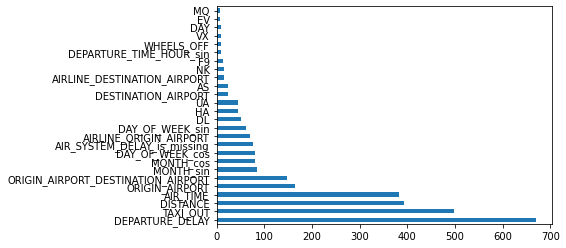

In [0]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[150 161 103  46  45  72   3   4   3  19   7   8   0   0   0  16   2  10
   0   8   0   7   0 100   0   0   0   0]


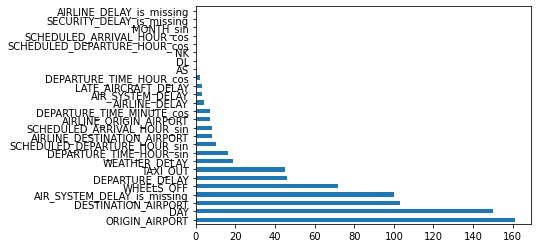

In [0]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

sel_cols=['DAY','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'AS', 'DL', 'NK',
       'DEPARTURE_TIME_HOUR_sin', 'DEPARTURE_TIME_HOUR_cos',
       'SCHEDULED_DEPARTURE_HOUR_sin', 'SCHEDULED_DEPARTURE_HOUR_cos',
       'SCHEDULED_ARRIVAL_HOUR_sin', 'SCHEDULED_ARRIVAL_HOUR_cos',
       'DEPARTURE_TIME_MINUTE_cos', 'MONTH_sin', 'AIR_SYSTEM_DELAY_is_missing',
       'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing',
       'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']

model = LGBMClassifier()
model.fit(X_train[sel_cols],Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=sel_cols)
feat_importances.nlargest(26).plot(kind='barh')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
val_df, test_df = train_test_split(test_data, test_size=0.333, random_state=0)

#Y_train=pd.DataFrame(train_data['OUTCOME'])
#X_train=train_data.drop("OUTCOME",axis=1)

Y_test=pd.DataFrame(test_df['OUTCOME'])
X_test=test_df.drop("OUTCOME",axis=1)

Y_valid=pd.DataFrame(val_df['OUTCOME'])
X_valid=val_df.drop("OUTCOME",axis=1)

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score
from sklearn import metrics

def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, scoring={'accuracy':make_scorer(accuracy_score),'roc_auc':make_scorer(roc_auc_score)},cv=5)
  print("Cross-validated scores:", scores)
  print("cross for accuracy",scores['test_accuracy'])
  print("cross for roc-auc",scores['test_roc_auc'])

In [0]:
from sklearn import metrics
def report(Y_test,pred):
  score1=metrics.roc_auc_score(Y_test,pred)
  score2=metrics.accuracy_score(Y_test,pred)

  print(f"Test ROC AUC score: {score1}")
  print(f"Test accuracy score: {score2}")
  print("Confusion matrix is ",metrics.confusion_matrix(Y_test,pred))
  print("Classification report is \n",metrics.classification_report(Y_test,pred))
  print("\n")

In [0]:
from math import log
from sklearn.metrics import mean_squared_error

def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic
  
def aic_and_bic(Y_test,pred,num_params):
  mse=mean_squared_error(Y_test,pred)
  print(pred)
  print('Number of parameters: %d' % (num_params))
  aic=calculate_aic(len(Y_train), mse, num_params)
  print('AIC: %.3f' % aic)
  bic = calculate_bic(len(y), mse, num_params)
  print('BIC: %.3f' % bic)

In [0]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import *
from sklearn.svm import *

import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
len(indices)

26

In [0]:
import numpy as np
indices=np.array([ 2,  3,  4,  5,  6, 11, 13, 14, 15, 16, 17, 20, 22, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44 , 45, 46, 47, 48, 49, 50])
len(indices)

35

In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runexpGaussianNBModel():
  model = GaussianNB()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpGaussianNBModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8176968526043207
Test accuracy score: 0.8929422759873568
Confusion matrix is  [[1009013       5]
 [ 152920  266497]]
Classification report is 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93   1009018
           1       1.00      0.64      0.78    419417

    accuracy                           0.89   1428435
   macro avg       0.93      0.82      0.85   1428435
weighted avg       0.91      0.89      0.88   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Cross-validated scores: {'fit_time': array([3.69219136, 2.33450365, 2.32742405, 2.32914233, 2.34983325]), 'score_time': array([0.76025367, 0.75396585, 0.76341629, 0.76463223, 0.75287008]), 'test_accuracy': array([0.89225658, 0.89254612, 0.89227223, 0.89244637, 0.89311928]), 'test_roc_auc': array([0.81650848, 0.81700036, 0.8165327 , 0.81683014, 0.81797531])}
cross for accuracy [0.89225658 0.89254612 0.89227223 0.89244637 0.89311928]
cross for roc-auc [0.81650848 0.81700036 0.8165327  0.81683014 0.81797531]


In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runexpLinearSVCModel():
  model = LinearSVC()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpLinearSVCModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8651812214537119
Test accuracy score: 0.9004028884758495
Confusion matrix is  [[959085  49933]
 [ 92335 327082]]
Classification report is 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93   1009018
           1       0.87      0.78      0.82    419417

    accuracy                           0.90   1428435
   macro avg       0.89      0.87      0.88   1428435
weighted avg       0.90      0.90      0.90   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: Data

In [0]:
import numpy as np
indices=np.array([ 2,  3,  4,  5,  6, 11, 13, 14, 15, 16, 17, 20, 22, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44 , 45, 46, 47, 48, 49, 50])
sel_cols=X_train.columns
sel_cols=sel_cols.drop(['AIR_TIME','TOTAL_TIME_HOUR', 'TOTAL_TIME_MINUTE', 'time'])
print(sel_cols,Y_train.OUTCOME.mean(),Y_test.OUTCOME.mean())

def runexpLGBMClassifierModel():
  model = LGBMClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpLGBMClassifierModel()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'DISTANCE', 'DIVERTED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
       'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT',
       'ORIGIN_AIRPORT_DESTINATION_AIRPORT', 'AA', 'AS', 'B6', 'DL', 'EV',
       'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN',
       'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'DEPARTURE_TIME_MINUTE',
       'SCHEDULED_DEPARTURE_MINUTE', 'SCHEDULED_ARRIVAL_MINUTE',
       'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing',
       'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing',
       'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing'],
      dtype='object') 0.5 0.2940363992608305


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [0 1 0 ... 0 0 1]
Test ROC AUC score: 0.8820196382302604
Test accuracy score: 0.9199148988056821
Confusion matrix is  [[327079   8726]
 [ 29368 110496]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94    335805
           1       0.93      0.79      0.85    139864

    accuracy                           0.92    475669
   macro avg       0.92      0.88      0.90    475669
weighted avg       0.92      0.92      0.92    475669





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([48.4647398 , 42.72922182, 42.34377289, 42.13983011, 42.82197142]), 'score_time': array([3.78408551, 3.21892834, 3.13968873, 3.18700218, 3.17622757]), 'test_accuracy': array([0.92030224, 0.92120012, 0.92018777, 0.92140596, 0.9213461 ]), 'test_roc_auc': array([0.87957384, 0.88079877, 0.87944371, 0.88110225, 0.8810937 ])}
cross for accuracy [0.92030224 0.92120012 0.92018777 0.92140596 0.9213461 ]
cross for roc-auc [0.87957384 0.88079877 0.87944371 0.88110225 0.8810937 ]


In [0]:
sel_cols=['MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT','SCHEDULED_TIME',
       'DISTANCE','AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'ORIGIN_AIRPORT_DESTINATION_AIRPORT',
       'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US',
       'VX', 'WN', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR',
       'SCHEDULED_DEPARTURE_MINUTE', 'SCHEDULED_ARRIVAL_MINUTE']

def runexpLGBMClassifierModel():
  model = LGBMClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpLGBMClassifierModel()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [0 0 0 ... 0 1 1]
Test ROC AUC score: 0.5458351713886467
Test accuracy score: 0.7181401352621255
Confusion matrix is  [[323758  12047]
 [122025  17839]]
Classification report is 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83    335805
           1       0.60      0.13      0.21    139864

    accuracy                           0.72    475669
   macro avg       0.66      0.55      0.52    475669
weighted avg       0.69      0.72      0.65    475669





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([30.27667642, 30.22298646, 31.24079847, 30.1203208 , 30.07002854]), 'score_time': array([3.05139422, 2.89231515, 2.87517762, 2.93129706, 2.94529629]), 'test_accuracy': array([0.720067  , 0.71952512, 0.71981181, 0.71959863, 0.71992943]), 'test_roc_auc': array([0.54158798, 0.54080524, 0.54136973, 0.54118958, 0.54147441])}
cross for accuracy [0.720067   0.71952512 0.71981181 0.71959863 0.71992943]
cross for roc-auc [0.54158798 0.54080524 0.54136973 0.54118958 0.54147441]


In [0]:
import numpy as np
indices=np.array([ 2,  3,  4,  5,  6, 11, 13, 14, 15, 16, 17, 20, 22, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44 , 45, 46, 47, 48, 49, 50])
sel_cols=X_train.columns
print(sel_cols)

def runexpDecisionTreeModel():
  tree = DecisionTreeClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  tree.fit(sel_X_train, Y_train)
  pred=tree.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(tree,X,y)

runexpDecisionTreeModel()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'DISTANCE', 'AIR_TIME', 'DIVERTED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'ORIGIN_AIRPORT_DESTINATION_AIRPORT',
       'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US',
       'VX', 'WN', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'DEPARTURE_TIME_MINUTE',
       'SCHEDULED_DEPARTURE_MINUTE', 'SCHEDULED_ARRIVAL_MINUTE',
       'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing',
       'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing',
       'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing'],
      dtype='object')
predictions are  [1 0 1 ... 0 0 0]
Test ROC AUC score: 0.9045139252481942
Test accuracy score: 0.

In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runexpRandomForestModel():
  forest = RandomForestClassifier(max_features=20,max_depth=25,min_samples_leaf=10,random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  forest.fit(sel_X_train, Y_train)
  pred=forest.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  #X=pd.concat([sel_X_train[:4285506],sel_X_test])
  #y=pd.concat([Y_train[:4285506],Y_test])
  #cross_validation(forest,X,y)

runexpRandomForestModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runLogisticRegressionModel():
  lrmodel=LogisticRegression()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  lrmodel.fit(sel_X_train, Y_train)
  pred=lrmodel.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(lrmodel,X,y)
  num_params = len(lrmodel.coef_) + 1
  aic_and_bic(Y_test,pred,num_params)

runLogisticRegressionModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predictions are  [1 0 1 ... 0 0 0]
Test ROC AUC score: 0.8234746541342873
Test accuracy score: 0.8808850245198416
Confusion matrix is  [[971244  37774]
 [132374 287043]]
Classification report is 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92   1009018
           1       0.88      0.68      0.77    419417

    accuracy                           0.88   1428435
   macro avg       0.88      0.82      0.85   1428435
weighted avg       0.88      0.88      0.88   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Cross-validated scores: {'fit_time': array([71.49201083, 71.02753925, 70.8672514 , 69.35539007, 66.81053948]), 'score_time': array([0.49758339, 0.48158693, 0.50345325, 0.49232674, 0.47578382]), 'test_accuracy': array([0.89134827, 0.88699479, 0.89161157, 0.89184783, 0.89183208]), 'test_roc_auc': array([0.81662505, 0.81950829, 0.81755177, 0.81652755, 0.81770001])}
cross for accuracy [0.89134827 0.88699479 0.89161157 0.89184783 0.89183208]
cross for roc-auc [0.81662505 0.81950829 0.81755177 0.81652755 0.81770001]


NameError: ignored

In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(max_bin=175,num_leaves=150,lambda_l1=2,lambda_l2=2,max_depth=100)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8800385453476021
Test accuracy score: 0.9190337677248177
Confusion matrix is  [[983301  25717]
 [ 89938 329479]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94   1009018
           1       0.93      0.79      0.85    419417

    accuracy                           0.92   1428435
   macro avg       0.92      0.88      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([24.3630302 , 21.44919086, 23.55398035, 21.66500092, 21.79883909]), 'score_time': array([1.08807039, 1.12044597, 1.11795592, 1.10131145, 1.07081175]), 'test_accuracy': array([0.91874966, 0.91907598, 0.9190821 , 0.91961326, 0.91984778]), 'test_roc_auc': array([0.87857381, 0.87930443, 0.87920195, 0.87997243, 0.8802891 ])}
cross for accuracy [0.91874966 0.91907598 0.9190821  0.91961326 0.91984778]
cross for roc-auc [0.87857381 0.87930443 0.87920195 0.87997243 0.8802891 ]


In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(max_bin=150,num_leaves=150,lambda_l1=5,lambda_l2=5,max_depth=90,bagging_fraction=0.8)#decrease bagging_fraction
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8801218185330523
Test accuracy score: 0.9188699520804237
Confusion matrix is  [[982781  26237]
 [ 89652 329765]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94   1009018
           1       0.93      0.79      0.85    419417

    accuracy                           0.92   1428435
   macro avg       0.92      0.88      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([127.14634275, 126.2050662 , 126.70763779, 124.28449559,
       124.9173944 ]), 'score_time': array([8.70712709, 8.36223364, 8.42549372, 8.31249499, 8.59716177]), 'test_accuracy': array([0.91871378, 0.91903748, 0.9189876 , 0.91954588, 0.91978127]), 'test_roc_auc': array([0.87859371, 0.8792676 , 0.87908454, 0.87981675, 0.88016625])}
cross for accuracy [0.91871378 0.91903748 0.9189876  0.91954588 0.91978127]
cross for roc-auc [0.87859371 0.8792676  0.87908454 0.87981675 0.88016625]


In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(learning_rate=0.2,max_bin=150,num_leaves=250,min_data_in_leaf=300,lambda_l1=4,lambda_l2=4,max_depth=80,bagging_fraction=0.7)#decrease bagging_fraction
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8877440288649189
Test accuracy score: 0.9240553472856657
Confusion matrix is  [[984515  24503]
 [ 83979 335438]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95   1009018
           1       0.93      0.80      0.86    419417

    accuracy                           0.92   1428435
   macro avg       0.93      0.89      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([129.25216079, 130.30028796, 131.82165766, 130.97301698,
       131.62712002]), 'score_time': array([9.29587865, 9.15999746, 9.16376209, 9.16367054, 9.23544073]), 'test_accuracy': array([0.92362282, 0.92385289, 0.92412941, 0.92457219, 0.92467632]), 'test_roc_auc': array([0.88671826, 0.88728062, 0.88735556, 0.88814275, 0.88833141])}
cross for accuracy [0.92362282 0.92385289 0.92412941 0.92457219 0.92467632]
cross for roc-auc [0.88671826 0.88728062 0.88735556 0.88814275 0.88833141]


In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(125,150),#               #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.6,0.7),
     'num_leaves':(250,300),#
     'min_data_in_leaf':(300,400),
     'lambda_l1':(1,2),#--6                    #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.4,0.5)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  6.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  6.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=90,
                                      num_leaves=31, objective=None,
                                      random_state=None, reg_...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=3,
             param_grid={'bag

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(100,125),#               #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.7,0.8),
     'num_leaves':(300,350),#
     'min_data_in_leaf':(300),
     'lambda_l1':(1),#                    #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.3,0.4)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  7.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  7.0min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  7.3min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 10.3min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 10.4min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 10.9min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 13.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=90,
                                      num_leaves=31, objective=None,
                                      random_state=None, reg_...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=3,
             param_grid={'bag

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.2,0.3),
     'lambda_l2':(2,4),     
     'max_depth':(60,80,90)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  6.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  7.2min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  7.7min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 10.4min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 11.0min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 11.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 14.0min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.4,0.5),
     'lambda_l2':(6,8),     
     'max_depth':(40,50)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=4,refit="accuracy",pre_dispatch=5,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  7.9min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 11.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 11.9min
[Parallel(n_jobs=4)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.4,0.5),
     'lambda_l2':(6,8),     
     'max_depth':(40,50)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=4,refit="accuracy",pre_dispatch=5,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  7.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 11.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'DISTANCE', 'DIVERTED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
       'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT',
       'ORIGIN_AIRPORT_DESTINATION_AIRPORT', 'AA', 'AS', 'B6', 'DL', 'EV',
       'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN',
       'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'DEPARTURE_TIME_MINUTE',
       'SCHEDULED_DEPARTURE_MINUTE', 'SCHEDULED_ARRIVAL_MINUTE',
       'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing',
       'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing',
       'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing'],
      dtype='object') 0.5 0.2940363992608305


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.564374	valid_0's binary_logloss: 0.564374
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.486876	valid_0's binary_logloss: 0.486876
[3]	valid_0's binary_logloss: 0.423082	valid_0's binary_logloss: 0.423082
[4]	valid_0's binary_logloss: 0.375786	valid_0's binary_logloss: 0.375786
[5]	valid_0's binary_logloss: 0.34568	valid_0's binary_logloss: 0.34568
[6]	valid_0's binary_logloss: 0.31757	valid_0's binary_logloss: 0.31757
[7]	valid_0's binary_logloss: 0.296965	valid_0's binary_logloss: 0.296965
[8]	valid_0's binary_logloss: 0.281506	valid_0's binary_logloss: 0.281506
[9]	valid_0's binary_logloss: 0.267785	valid_0's binary_logloss: 0.267785
[10]	valid_0's binary_logloss: 0.256985	valid_0's binary_logloss: 0.256985
[11]	valid_0's binary_logloss: 0.249324	valid_0's binary_logloss: 0.249324
[12]	valid_0's binary_logloss: 0.242249	valid_0's binary_logloss: 0.242249
[13]	valid_0's binary_logloss: 0.237436	valid_0's b

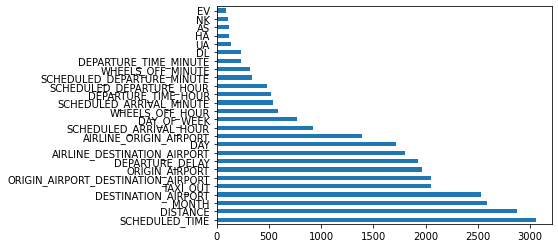

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Cross-validated scores: {'fit_time': array([86.63766313, 83.10069776, 82.7833221 , 82.68622446, 83.42143011]), 'score_time': array([6.25751114, 6.18369293, 6.3242259 , 6.11407065, 6.41895604]), 'test_accuracy': array([0.92484002, 0.92511209, 0.92520047, 0.92582089, 0.92579639]), 'test_roc_auc': array([0.88769389, 0.88838264, 0.88836449, 0.88929134, 0.88942293])}
cross for accuracy [0.92484002 0.92511209 0.92520047 0.92582089 0.92579639]
cross for roc-auc [0.88769389 0.88838264 0.88836449 0.88929134 0.88942293]


In [0]:
import numpy as np
import matplotlib.pyplot as plt

indices=np.array([ 2,  3,  4,  5,  6, 11, 13, 14, 15, 16, 17, 20, 22, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44 , 45, 46, 47, 48, 49, 50])
#indices=np.array([49, 50])

sel_cols=X_train.columns
sel_cols=sel_cols.drop('AIR_TIME')
print(sel_cols,Y_train.OUTCOME.mean(),Y_test.OUTCOME.mean())

def runLGBMClassifierModel():
  model=LGBMClassifier(extra_trees=True,num_iterations=100,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=3,max_bin=125,min_data_in_leaf=300,num_leaves=300,lambda_l2=8,learning_rate=0.2,max_depth=40)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  sel_X_valid=X_valid[sel_cols]
  eval_set = [(sel_X_test, Y_test)]
  model.fit(sel_X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

  print("Test dataset:")
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)

  print("\n")

  print("Validation dataset:")
  pred=model.predict(sel_X_valid)
  print("predictions are ",pred)
  report(Y_valid,pred)

  
  print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=sel_cols)
  feat_importances.nlargest(26).plot(kind='barh')
  plt.show()

  X=pd.concat([sel_X_train[:4285506],sel_X_test,sel_X_valid])
  y=pd.concat([Y_train[:4285506],Y_test,Y_valid])
  cross_validation(model,X,y)

runLGBMClassifierModel()

In [0]:
def runXGBoostModel():
  # fit model no training data
  model = XGBClassifier(learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=300, 
                      reg_alpha = 0.3,
                      max_depth=4,
                      n_jobs=10,
                      gamma=10)
  model.fit(X_train, Y_train)
  # make predictions for test data
  y_pred = model.predict(X_test)
  print("Initial predictions are ",y_pred)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  report(Y_test,predictions)
  X=pd.concat([X_train,X_test])
  y=pd.concat([Y_train,Y_test])
  cross_validation(model,X,y)
  
runXGBoostModel()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[08:09:19] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Initial predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.86731179532437
Test accuracy score: 0.9062176437849815
Confusion matrix is  [[970241  38777]
 [ 95185 324232]]
Classification report is 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94   1009018
           1       0.89      0.77      0.83    419417

    accuracy                           0.91   1428435
   macro avg       0.90      0.87      0.88   1428435
weighted avg       0.91      0.91      0.90   1428435





NameError: ignored

In [0]:
def runXGBoostModel():
  # fit model no training data
  model = XGBClassifier()
  eval_set = [(X_test, Y_test)]
  model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
  # make predictions for test data
  y_pred = model.predict(X_test)
  print("Initial predictions are ",y_pred)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  report(Y_test,predictions)
  X=pd.concat([X_train,X_test])
  y=pd.concat([Y_train,Y_test])
  cross_validation(lgbclassifier,X,y)
  
runXGBoostModel()